In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize']=[16,8]

# Data preprocessing

In [4]:
df=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone datasets\3_hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Data Dictionary :

Dataset contains  bookings from  1st of July of 2015 and the 31st of August 2017




ADR-- Numeric -- Average Daily Rate

Adults-- Integer-- Number of adults

Agent--- Categorical---ID of the travel agency that made the bookings

ArrivalDateDayOfMonth--- Integer--- Day of the month of the arrival date

ArrivalDateMonth--- Categorical--- Month of arrival date with 12 categories: “January” to “December”
    
ArrivalDateWeekNumber--- Integer--- Week number of the arrival date

ArrivalDateYear--- Integer--- Year of arrival date

AssignedRoomType--- Categorical--- Code for the type of room assigned to the booking.

            Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
            Code is presented instead of designation for anonymity reasons

Babies-- Integer--- Number of babies

BookingChanges--- Integer--- Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

Children--- Integer-- Number of children--- BO and BL/Sum of both payable and non-payable children

Company--- Categorical--- ID of the company/entity that made the booking or responsible for paying the booking.

Country--- Categorical--- Country of origin.

CustomerType--- Categorical--- Type of booking, assuming one of four categories:
    
        Contract - when the booking has an allotment or other type of contract associated to it;
        Group – when the booking is associated to a group;
        Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
        Transient-party – when the booking is transient, but is associated to at least other transient booking
        
DaysInWaitingList--- Integer--- Number of days the booking was in the waiting list before it was confirmed to the customer

DepositType--- Categorical--- Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    
        No Deposit – no deposit was made--In case no payments were found the value is “No Deposit”.
        
        Non Refund – a deposit was made in the value of the total stay cost
                     If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”.
        
        Otherwise the value is set as “Refundable”
        Refundable – a deposit was made with a value under the total cost of stay.
        
DistributionChannel--- Categorical--- Booking distribution channel.
                    The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    
IsCanceled--- Categorical--- Value indicating if the booking was canceled (1) or not (0)

IsRepeatedGuest--- Categorical--- Value indicating if the booking name was from a repeated guest (1) or not (0)

LeadTime--- Integer--- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

MarketSegment--- Categorical--- Market segment designation.

                In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”


Meal--- Categorical--- Type of meal booked. Categories are presented in standard hospitality meal packages:
    
            Undefined/SC – no meal package;
            BB – Bed & Breakfast;
            HB – Half board (breakfast and one other meal – usually dinner);
            FB – Full board (breakfast, lunch and dinner)
            
PreviousBookingsNotCanceled--- Integer--- Number of previous bookings not cancelled by the customer prior to the current booking

PreviousCancellations---Integer---Number of previous bookings that were cancelled by the customer prior to the current booking

RequiredCardParkingSpaces---Integer---Number of car parking spaces required by the customer




ReservationStatus--- Categorical--- Reservation last status, assuming one of three categories:
    
            Canceled – booking was canceled by the customer;
            Check-Out – customer has checked in but already departed;
            No-Show – customer did not check-in and did inform the hotel of the reason why?
            
ReservationStatusDate--- Date--- Date at which the last status was set.

ReservedRoomType--- Categorical--- Code of room type reserved. Code is presented instead of designation for anonymity reasons

StaysInWeekendNights--- Integer--- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

StaysInWeekNights--- Integer--- Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

TotalOfSpecialRequests--- Integer--- Number of special requests made by the customer (e.g. twin bed or high floor)


In [5]:
df.shape

(119390, 32)

The data have 119390 records and 32 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
c=df.select_dtypes(include='object')
print('The raw data has ',len(c.columns),' number of categorical features.')

print()

n=df.select_dtypes(include=[np.number])
print('The raw data has ',len(n.columns),' number of  numerical features.')

The raw data has  12  number of categorical features.

The raw data has  20  number of  numerical features.


Type casting

In [8]:
df['is_canceled']=df['is_canceled'].astype(object)   

df['is_repeated_guest']=df['is_repeated_guest'].astype(object)

df['reservation_status_date']=df['reservation_status_date'].apply(pd.to_datetime)

df['agent']=df['agent'].astype(object)

In [9]:
 #  Keeping arrival_date_year','arrival_date_month','arrival_date_day_of_month' as interger and object for ease of EDA.
 
 # Since the dates are insignificant for prediction we will drop these  while modeling .

In [9]:
categorical=df.select_dtypes(include='object')
print('The data has ',len(categorical.columns),'  number of categorical features.')

print()

numerical=df.select_dtypes(include=[np.number])
print('The data has ',len(numerical.columns),'number of  numerical features.')

The data has  14   number of categorical features.

The data has  17 number of  numerical features.


Checking For Duplicate Value:-

In [10]:
duplicate_values=df[df.duplicated()]
print("There are",duplicate_values.shape[0],"Duplicated Values")
df=df.drop_duplicates()

print("Before Removing the duplicated value the length was",df.shape[0])
print("After Removing duplicated value length of our Data is",df.shape[0])


There are 31994 Duplicated Values
Before Removing the duplicated value the length was 87396
After Removing duplicated value length of our Data is 87396


Null Value Treatment

In [11]:
#NULL VALUES

print(df.isnull().sum())

print()
print('*****'*50)

null_percent=(df.isnull().sum())/(len(df))*100
null_percent.sort_values(ascending=False)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

From above we can see 4 columns having Null value

1.Children (0.003)




2.Country  (0.4)



3.Agent    (13.6)



4.Company  (94.3)



1.For Children the Null means Parents are not having any child so we can replacing or filling with 0 (Zero).




2.Country we are replacing by Unknown because if a man booking a hotel some time he forget to mention his country.




3.Agent Here null values are some booking  are not done with the help of Agent .
  so we can assume that the booking is made by the individual himself.
  so we can replace it with 0 - means the individual made booking himself.



4.Company are having lot of blank record we can replace it with Not applicable but I am droping that columns 
because many record will be Not applicable so the column will be having 94 percent weightage which is not good for our Model.


Treating Null Values.

In [12]:
df.drop('company',axis=1,inplace=True) #94% Null value we cant use these column or 
#otherwise we will ask more data to the client at these situation.
df['children']=df['children'].fillna(0) 
df['country']=df['country'].fillna("Unknown")
df['agent']=df['agent'].fillna(0)

In [13]:
print("Filled Null Values \n \n",(df.isnull().sum()/len(df)*100))

Filled Null Values 
 
 hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type              

In [14]:
#Several rows in the dataset contains values that does not make any sense like having no adults, children and babies

In [15]:
df1=df.copy()

In [16]:
len(df1[(df1.adults==0)&(df1.babies==0)&(df1.children==0)])

166

In [17]:
#drop such rows

indices=df1[(df1.adults==0)&(df1.babies==0)&(df1.children==0)].index.values
df1.drop(index=indices,axis=0,inplace=True)
df1.shape

(87230, 31)

In [18]:
df1.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.030402,0.184054,0.268497,81.089258,0.746291,106.518031,0.084306,0.698934
std,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.369344,1.733033,0.710633,109.977255,10.001001,54.891227,0.281659,0.832051
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.200000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
#adr has minimum value of -6, that doesn't make any sense 
#so drop that also


In [20]:
ind=df1[df1['adr']<0].index.values
df1.drop(index=ind,axis=0,inplace=True)
df1.shape

(87229, 31)

In [21]:
df1.adr.nunique()

8865

In [22]:
len(df1[df1['adr']>500])

3

In [23]:
len(df1[df1['adr']<50])

9460

In [24]:
len(df1[df1['adr']<10])

1848

In [25]:
len(df1[df1['adr']==0])

1643

In [26]:
len(df1[(df1['adr']>10)  & (df1['adr']<40)])

3469

In [27]:
df2=df1.copy()

In [30]:
df1.dtypes

hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

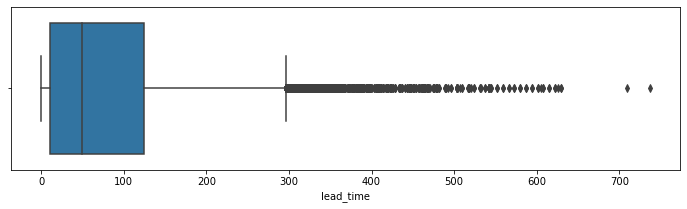

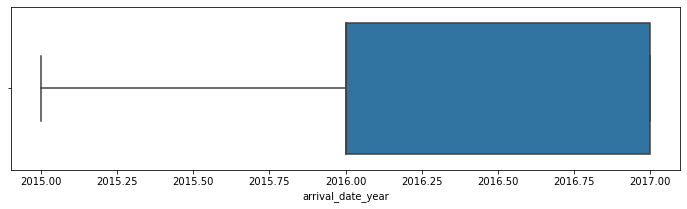

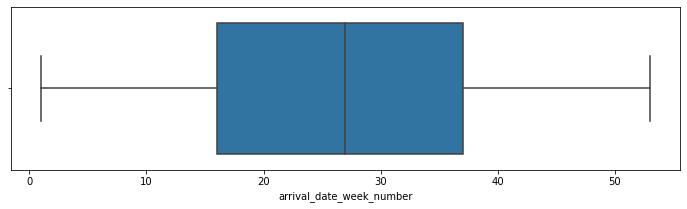

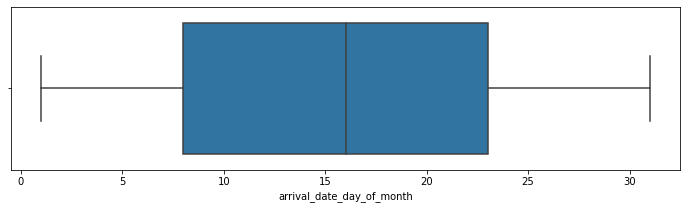

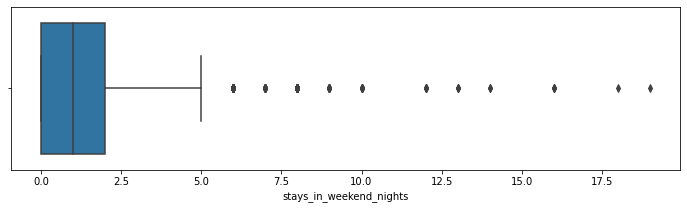

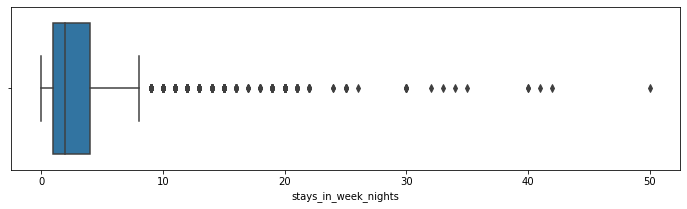

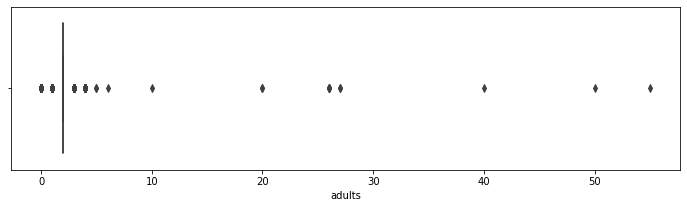

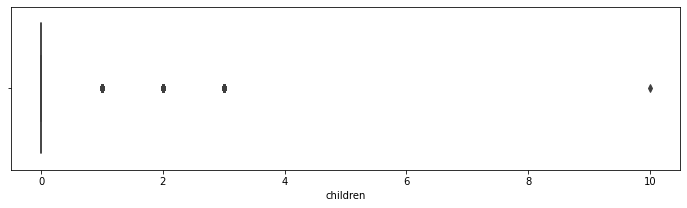

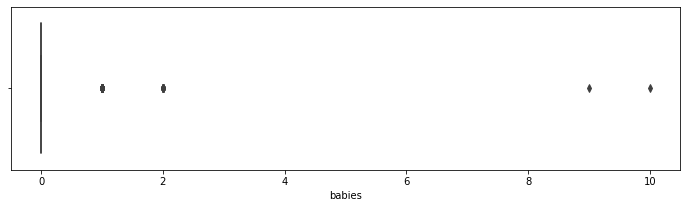

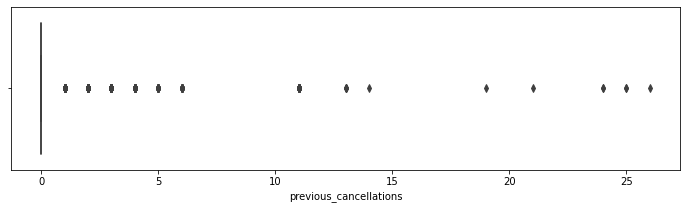

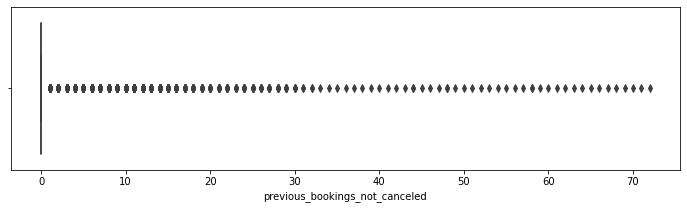

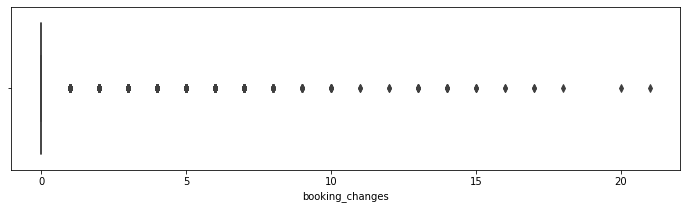

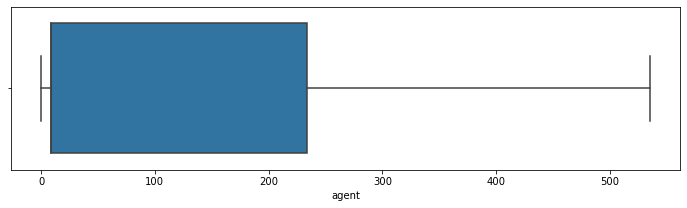

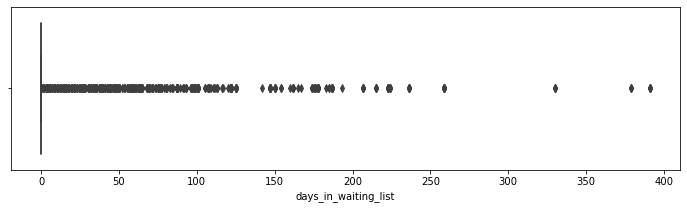

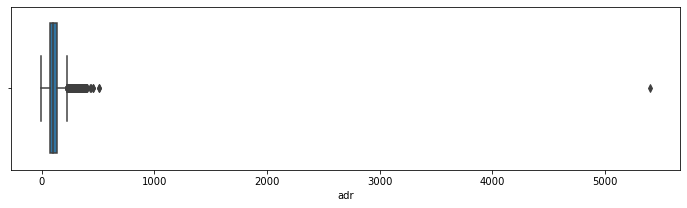

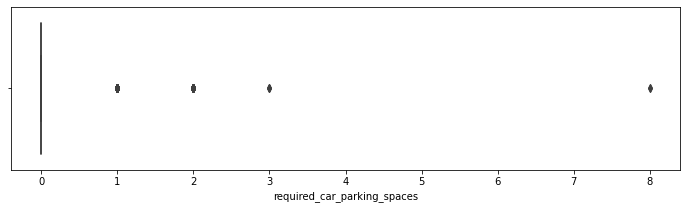

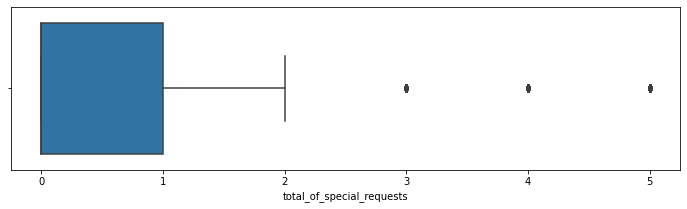

In [28]:
for i in df1.select_dtypes(np.number).columns:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=df[i])
    plt.show()

In [29]:
#converting the adr into different groups.
lis=[]
for i in df2['adr']:
    if i ==0 :
        lis.append('Free_stay')
    elif 0<i<=15:
        lis.append('Cheepest')
    elif 15<i<=50:
        lis.append('Moderate_cheep')
    elif 50<i<=100:
        lis.append('Moderate')
    elif 100<i<=200:
        lis.append('High')
    elif 200<i<=400:
        lis.append('Very High')
    else :
        lis.append('Premium')
        
        

df2['adr_level']=lis


In [31]:
print('After pre-processing the data have  : ')
print()
print(df1.shape[0],' number of records and ',df1.shape[1],'number of columns')

After pre-processing the data have  : 

87229  number of records and  31 number of columns


In [32]:
categorical=df1.select_dtypes(include='object')
print('The data has ',len(categorical.columns),'  number of categorical features.')

print()

numerical=df1.select_dtypes(include=[np.number])
print('The data has ',len(numerical.columns),'number of  numerical features.')

The data has  13   number of categorical features.

The data has  17 number of  numerical features.


# EDA(EXPLORATORY DATA ANALYSIS)

 Representation of uni-variate of distribution.

Representation of uni-variate of distribution


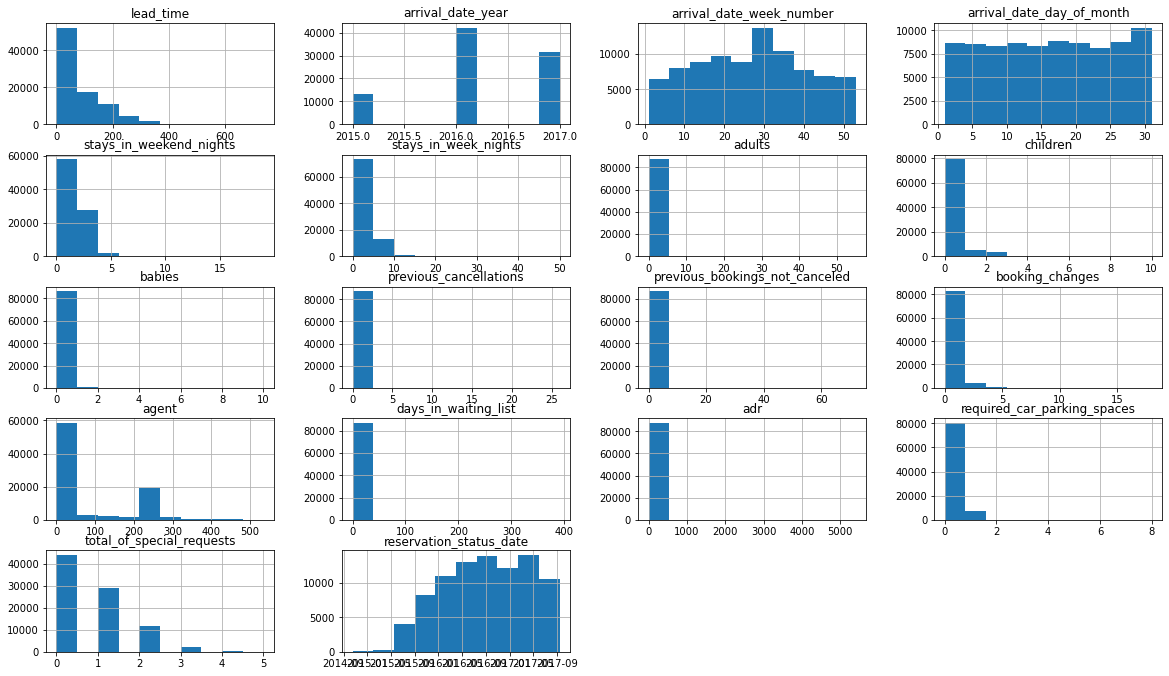

In [31]:
df1.hist(figsize=(20,14),layout=(6,4))
print("Representation of uni-variate of distribution")


How Many Bookings Were Cancelled?

Not Cancelled Booking :  63220
Cancelled Booking :  24009


The percentage of bookings made and cancelled : 
0    72.475897
1    27.524103
Name: is_canceled, dtype: float64



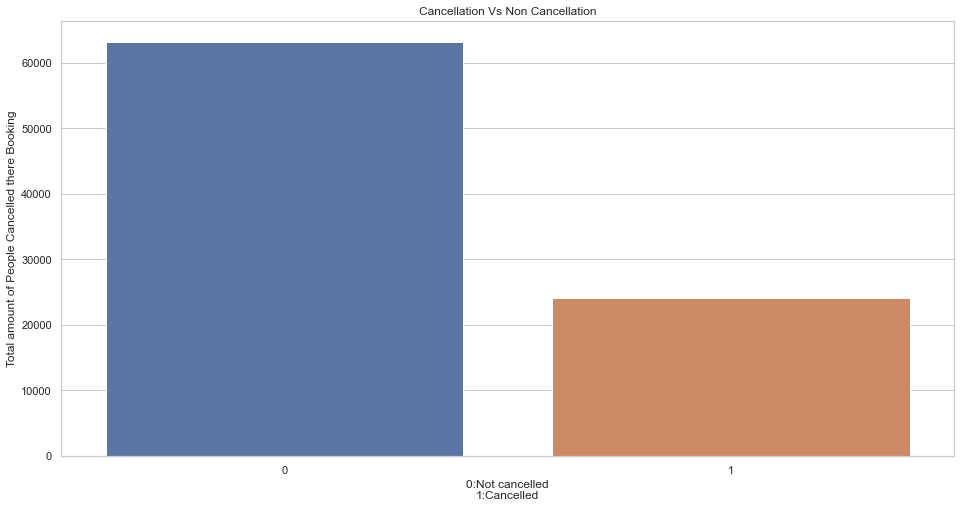

In [32]:
cancelled=df1[df1['is_canceled']==1]
not_cancelled=df1[df1['is_canceled']==0]

print("Not Cancelled Booking : ",len(not_cancelled))
print("Cancelled Booking : ",len(cancelled))
print()

print()
print('The percentage of bookings made and cancelled : ')
print(df1.is_canceled.value_counts(normalize=True)*100)
print()

sns.set(style = "whitegrid")
sns.countplot(x='is_canceled',data=df1)
plt.title("Cancellation Vs Non Cancellation")
plt.ylabel("Total amount of People Cancelled there Booking")
plt.xlabel("0:Not cancelled\n1:Cancelled")
plt.show()

What is the booking Percentage between Resort Hotel and City Hotel?

Total Bookings and Non Booking In Hotels

City Hotel      60.957023
Resort Hotel    38.851893
Name: hotel, dtype: float64


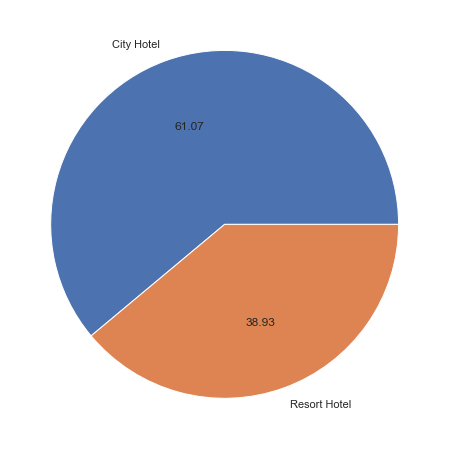

In [33]:
print("Total Bookings and Non Booking In Hotels")
print()
p=df1['hotel'].value_counts()/len(df)*100
plt.pie(p,autopct="%.2f",labels=['City Hotel','Resort Hotel'])
print(p)
plt.show()

Booking Percentage of Cancellation Between Resort and City Hotels 
 City Hotel      66.787455
Resort Hotel    33.212545
Name: hotel, dtype: float64

###################################

Booking Percentage of Non Cancellation Between Resort and City Hotels 
 City Hotel      58.903828
Resort Hotel    41.096172
Name: hotel, dtype: float64


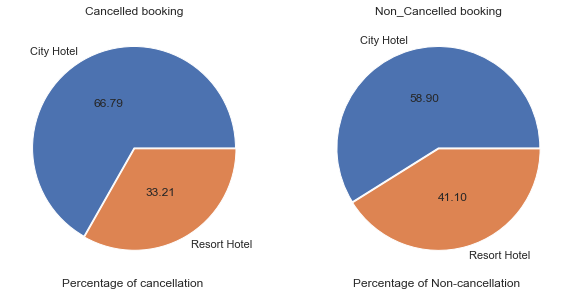

In [34]:
plt.figure(figsize=(10,15))
x=cancelled['hotel'].value_counts()/len(cancelled)*100
myexplode = [0, 0.01]
plt.subplot(1,2,1)
plt.pie(x,autopct="%.2f",labels=['City Hotel','Resort Hotel'],pctdistance=0.5,explode=myexplode)
print("Booking Percentage of Cancellation Between Resort and City Hotels \n",x)
plt.title("Cancelled booking")
plt.xlabel("Percentage of cancellation ")
y=not_cancelled['hotel'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
plt.pie(y,autopct="%.2f",labels=['City Hotel','Resort Hotel'],pctdistance=0.5,explode=myexplode)
plt.title("Non_Cancelled booking")
plt.xlabel("Percentage of Non-cancellation ")
print()
print("###################################")
print()
print("Booking Percentage of Non Cancellation Between Resort and City Hotels \n",y)




What is the percentage of booking for each year?

Total Percentage of Booking per year

City Hotel      60.957023
Resort Hotel    38.851893
Name: hotel, dtype: float64


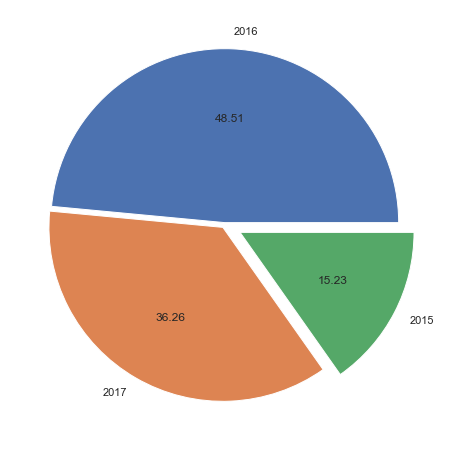

In [35]:
print("Total Percentage of Booking per year")
print()
myexplode=[0.01,0.02,0.1]
z=df1['arrival_date_year'].value_counts()/len(df)*100
plt.pie(z,autopct="%.2f",labels=z.index,explode=myexplode)
print(p)

2016    46.649173
2017    42.092549
2015    11.258278
Name: arrival_date_year, dtype: float64


2016    49.213856
2017    34.049351
2015    16.736792
Name: arrival_date_year, dtype: float64

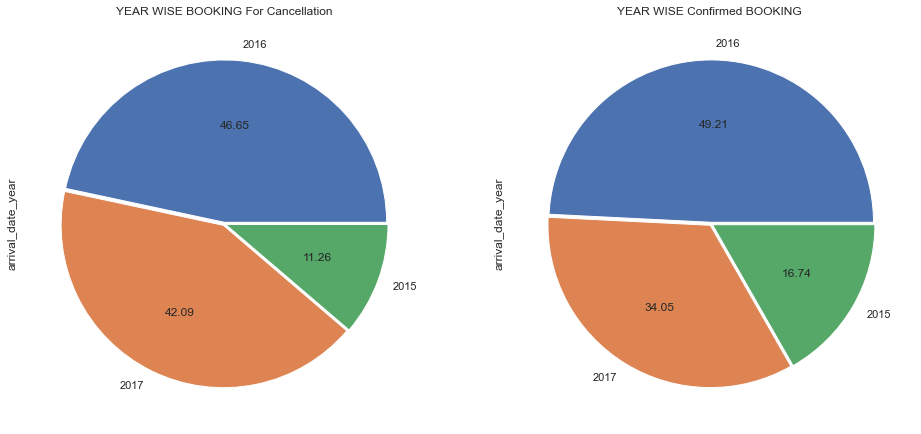

In [36]:
plt.figure(figsize=(16,12))
percentage_of_booking_each_year=cancelled['arrival_date_year'].value_counts()/len(cancelled)*100
plt.subplot(1,2,1)
percentage_of_booking_each_year.plot(kind='pie',autopct='%.2f',explode=[0.01,0.01,0.01])
percentage_of_booking_each_year
plt.title("YEAR WISE BOOKING For Cancellation")
print(percentage_of_booking_each_year)


percentage_of_bookink_each_year=not_cancelled['arrival_date_year'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
percentage_of_bookink_each_year.plot(kind='pie',autopct='%.2f',explode=[0.01,0.01,0.01])
percentage_of_bookink_each_year
plt.title("YEAR WISE Confirmed BOOKING ")
percentage_of_bookink_each_year

Which is the busiest month for hotels?

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,0,1876,1603,0,0,1160,0,0,0,1419,2254,2269
2016,2754,2973,2132,2273,1548,2754,2604,2940,2836,2502,3025,2772
2017,2740,2771,0,2398,2100,2933,2799,2719,3066,0,0,0


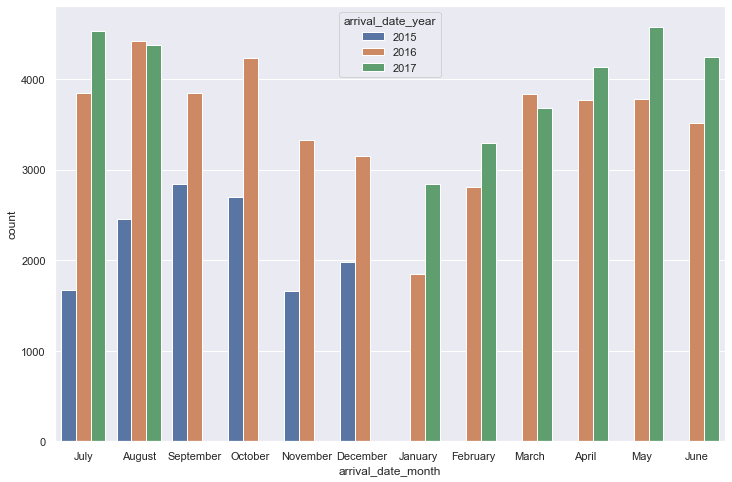

In [37]:
bussy_month_for_each_year=pd.crosstab(not_cancelled['arrival_date_year'],not_cancelled['arrival_date_month'])
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(x='arrival_date_month',hue='arrival_date_year',data=df)
bussy_month_for_each_year

 Percentage of Repeated Guest?

In [38]:
repeated_guest=len(not_cancelled[not_cancelled['is_repeated_guest']==1])/len(not_cancelled)*100
print("Percent of Repeated Guest is",np.round(repeated_guest,2),"%")


Percent of Repeated Guest is 4.91 %


Percentage of cancellation against each deposit.

is_canceled       0      1
deposit_type              
No Deposit    63084  23000
Non Refund       55    983
Refundable       81     26

The percentage of cancellation  is_canceled       0      1
deposit_type              
No Deposit    99.78  95.80
Non Refund     0.09   4.09
Refundable     0.13   0.11


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

<Figure size 1152x1008 with 0 Axes>

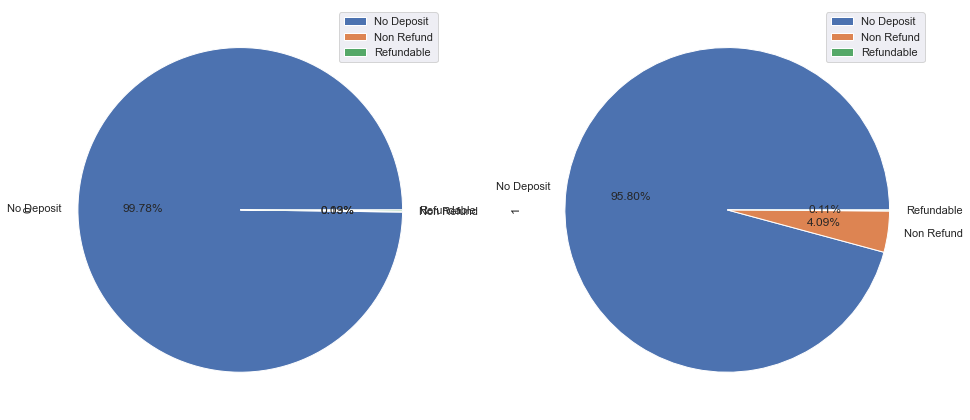

In [39]:
deposit=pd.crosstab(df1['deposit_type'],df1['is_canceled'])
print(deposit)
print()

print('The percentage of cancellation ',deposit.apply(lambda x : round((x/x.sum())*100,2) ,axis=0))

plt.figure(figsize=(16,14))
deposit.plot(kind='pie',subplots=True,autopct='%1.2f%%')

Which Month has got Highest Cancellation

Highest cancellation in Each Months


arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,0,571,372,0,0,512,0,0,0,243,440,565
2016,1013,1442,1005,526,301,1088,911,886,941,809,1202,1076
2017,1393,1609,0,886,736,1596,1442,943,1501,0,0,0


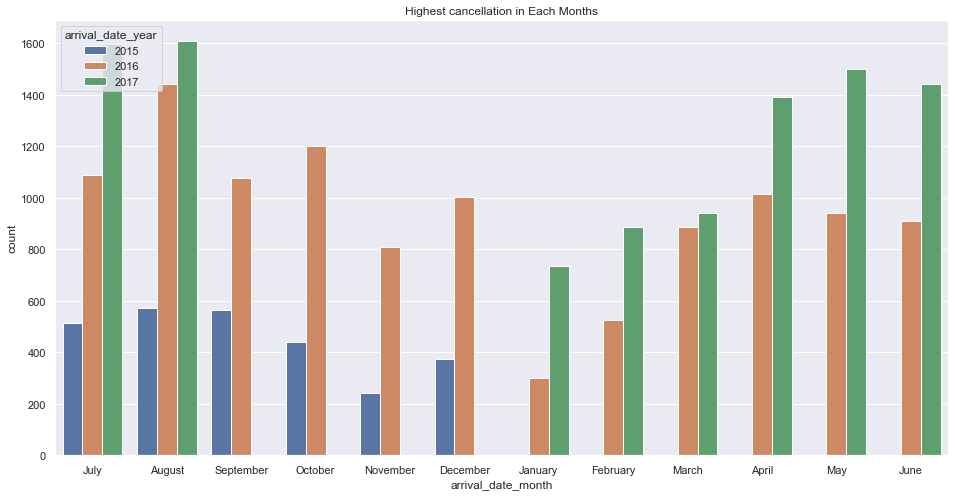

In [40]:
c=pd.crosstab(cancelled['arrival_date_year'],cancelled['arrival_date_month'])
plt.figure(figsize=(16,8))
sns.countplot(cancelled['arrival_date_month'],hue=cancelled['arrival_date_year'])
plt.title("Highest cancellation in Each Months")
print("Highest cancellation in Each Months")
c

In [41]:
#From the graph we can say that july,august,sep,october are the busiest months.

Understand the relationship between cancellation and special request.

0    60.648090
1    27.077346
2    10.475238
3     1.649381
4     0.141614
5     0.008330
Name: total_of_special_requests, dtype: float64


Text(0, 0.5, 'Number of Special Request')

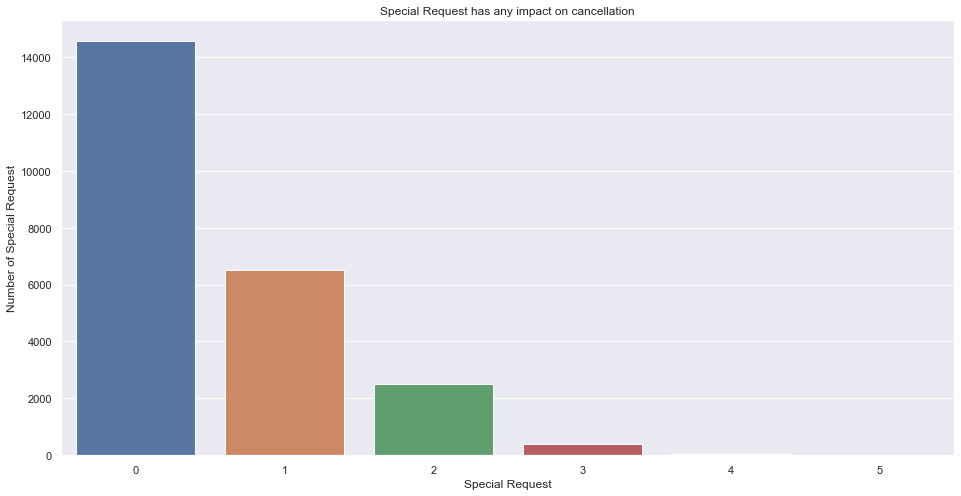

In [42]:
print(cancelled['total_of_special_requests'].value_counts(normalize=True)*100)
sns.countplot(cancelled['total_of_special_requests'])

plt.title("Special Request has any impact on cancellation")
plt.xlabel("Special Request")
plt.ylabel("Number of Special Request")

In [43]:
#From the graph we can say that , total specal requests and  booking cancellation is not related at all.

Compare against Market_Segment and is_canceled.

Online TA        75.979841
Offline TA/TO     8.567620
Direct            7.234787
Groups            5.547920
Corporate         2.120038
Complementary     0.354034
Aviation          0.187430
Undefined         0.008330
Name: market_segment, dtype: float64


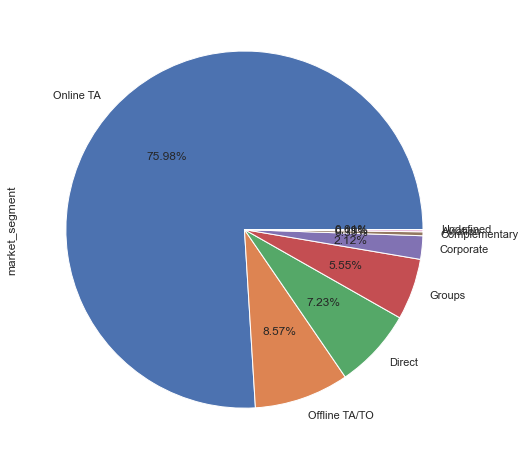

In [44]:
can_market=cancelled['market_segment'].value_counts(normalize=True)*100
print(can_market)
plt.figure(figsize=(8,14))
cancelled['market_segment'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()


In [45]:
#Out of the total cancelled bookings , 75 % made booking made through Online Travel Agent.

Online TA        52.690604
Offline TA/TO    18.661816
Direct           15.885796
Corporate         5.838342
Groups            5.677001
Complementary     0.960139
Aviation          0.286302
Name: market_segment, dtype: float64


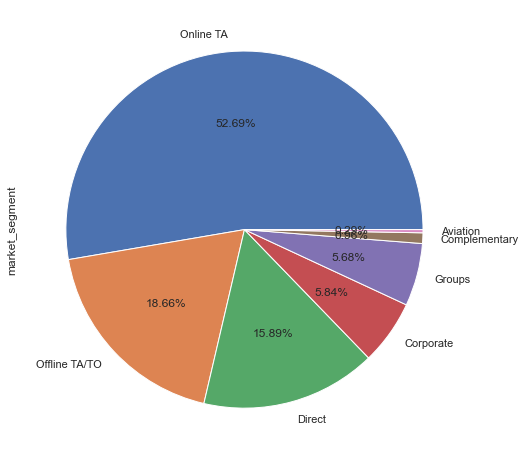

In [46]:
not_can_market=not_cancelled['market_segment'].value_counts(normalize=True)*100
print(not_can_market)
plt.figure(figsize=(8,14))
not_cancelled['market_segment'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [47]:
#Here we can see that  most of the successful booking made(53%) and most booking cancelled(76%) was by Online Travel Agent.

 Compare between meal and is_canceled

Meals for cancelled
is_canceled          1
meal                  
BB           75.150985
FB            0.412345
HB           10.200342
SC           13.894789
Undefined     0.341539

Meals for not_cancelled
is_canceled          0
meal                  
BB           78.872192
FB            0.412844
HB           10.488769
SC            9.577665
Undefined     0.648529


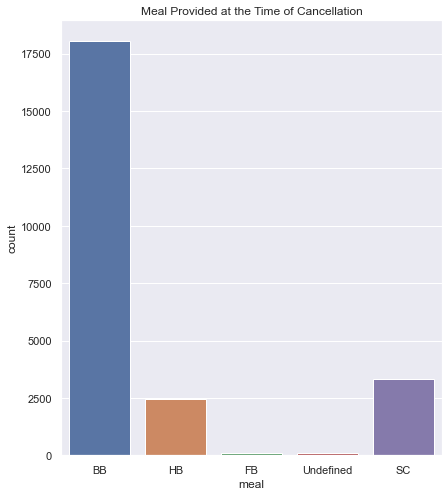

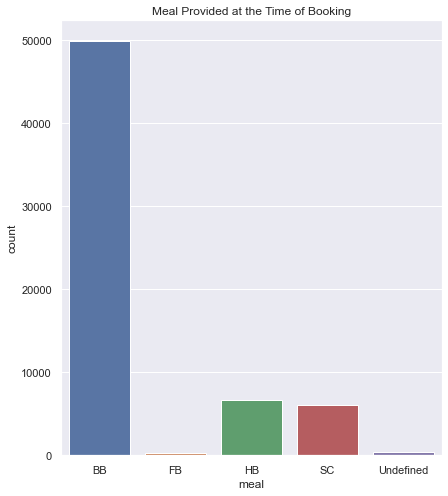

In [48]:
x=pd.crosstab(cancelled['meal'],cancelled['is_canceled'])
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(cancelled['meal'])
plt.title("Meal Provided at the Time of Cancellation")
print("Meals for cancelled")
print(x.apply(lambda x : (x/x.sum())*100 ,axis=0))

print()
print("Meals for not_cancelled")
y=pd.crosstab(not_cancelled['meal'],not_cancelled['is_canceled'])
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
sns.countplot(not_cancelled['meal'])
plt.title("Meal Provided at the Time of Booking")
print(y.apply(lambda x : (x/x.sum())*100 ,axis=0))

Customer preference towards the booking room type.

In [49]:
# Single: A room assigned to one person. May have one or more beds.
# Double: A room assigned to two people. May have one or more beds.
# Triple: A room assigned to three people. May have two or more beds.
# Quad: A room assigned to four people. May have two or more beds.



# Queen: A room with a queen-sized bed. May be occupied by one or more people.
# King: A room with a king-sized bed. May be occupied by one or more people.
# Twin: A room with two beds. May be occupied by one or more people.
# Double-double: A room with two double (or perhaps queen) beds. May be occupied by one or more people.
# Studio: A room with a studio bed – a couch that can be converted into a bed. May also have an additional bed

# Types of Suites can include:

# Master Suite: A parlour or living room connected to one or more bedrooms.
# Mini-Suite or Junior Suite: A single room with a bed and sitting area. Sometimes the sleeping area is in a bedroom separate from the parlour or living room.
# Other types of rooms names can include:

# Connecting rooms: Rooms with individual entrance doors from the outside and a connecting door between. Guests can move between rooms without going through the hallway.
# Adjoining rooms: Rooms with a common wall, but no connecting door.
# Adjacent rooms: Rooms close to each other, perhaps across the hall.

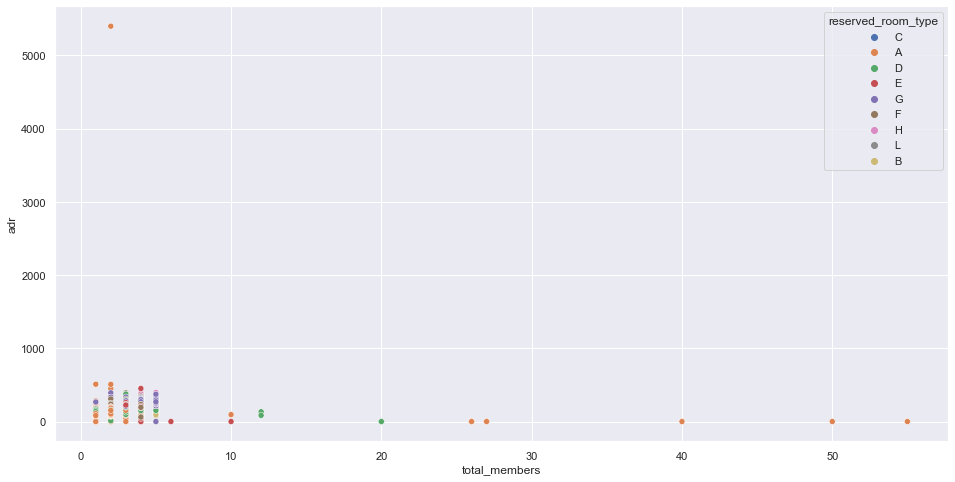

In [50]:


df2['total_members']=df1['adults']+df1['children']+df1['babies']
df2['total_members']

sns.scatterplot(x=df2.total_members,y=df2.adr,hue=df2.reserved_room_type)
plt.show()

In [51]:
#From the graph we cant get into a proper conclusion of room types,
#But we can say that there is chance that
# A -  Quad: A room assigned to four people. May have two or more beds.
    
# D -  Triple: A room assigned to three people. May have two or more beds.
    
# E -  Double: A room assigned to two people. May have one or more beds.

A    64.697520
D    19.919981
E     6.919717
F     3.232870
G     2.350136
B     1.141822
C     1.047817
H     0.683259
L     0.006878
Name: reserved_room_type, dtype: float64


<AxesSubplot:title={'center':'Preference of room by customers'}, ylabel='reserved_room_type'>

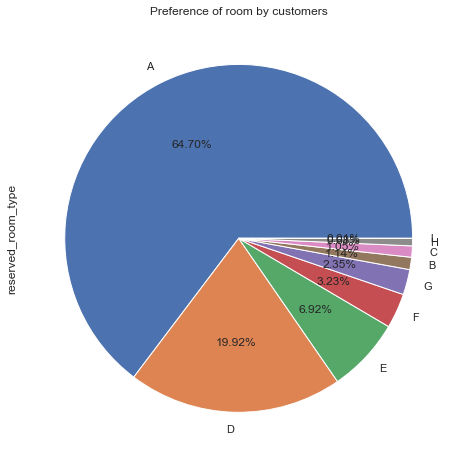

In [52]:
plt.title('Preference of room by customers')
print(df1['reserved_room_type'].value_counts(normalize=True)*100)

df1['reserved_room_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')



In [53]:
#we can see that about 85% of peoples are choosing room type A(65%) and D(20%) only.

<AxesSubplot:title={'center':'Room Type was Given'}, xlabel='assigned_room_type', ylabel='count'>

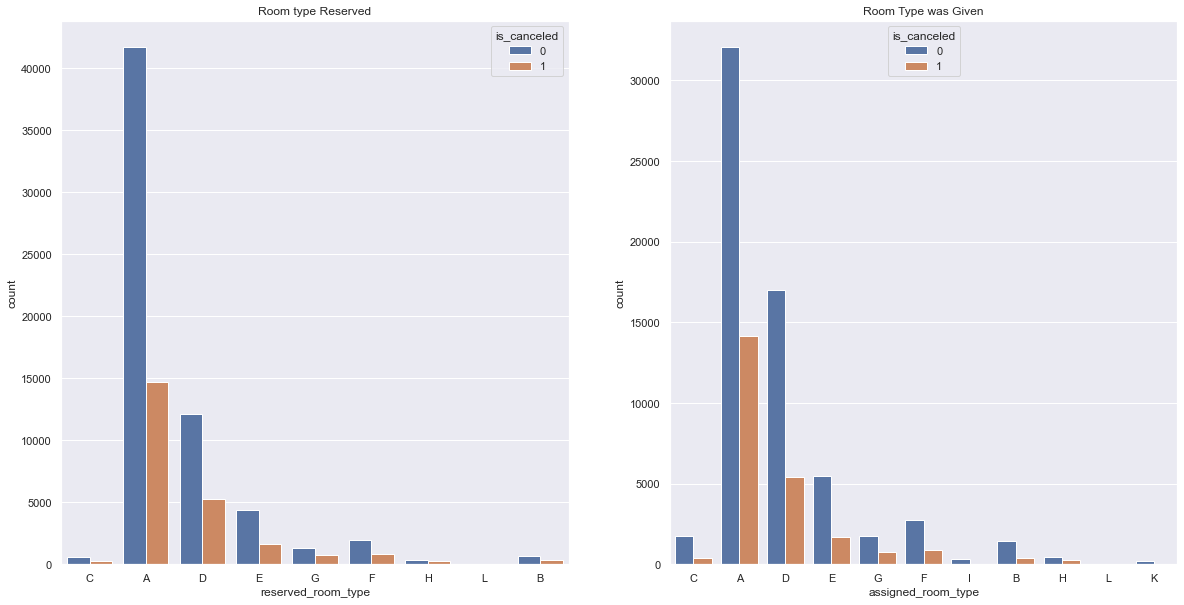

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Room type Reserved")
sns.countplot(df1['reserved_room_type'],hue=df1['is_canceled'])

plt.subplot(1,2,2)
plt.title("Room Type was Given")
sns.countplot(df1['assigned_room_type'],hue=df1['is_canceled'])

Relationship between parking and is_canceled.



0    91.624345
1     8.337823
2     0.032099
3     0.003439
8     0.002293
Name: required_car_parking_spaces, dtype: float64


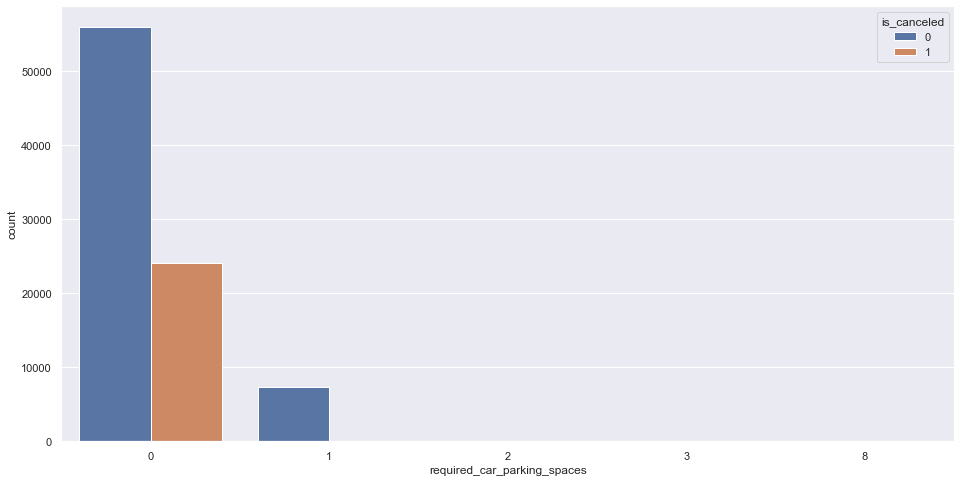

In [55]:
print(df1['required_car_parking_spaces'].value_counts(normalize=True)*100)
sns.countplot(df1['required_car_parking_spaces'],hue=df1['is_canceled'])
plt.show()

0    100.0
Name: required_car_parking_spaces, dtype: float64


0    88.443531
1    11.504271
2     0.044290
3     0.004745
8     0.003164
Name: required_car_parking_spaces, dtype: float64

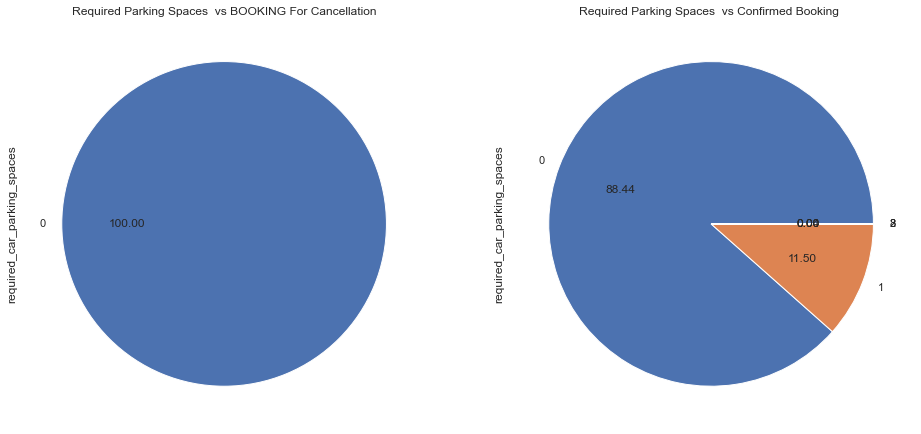

In [56]:
plt.figure(figsize=(16,12))
percentage_of_booking_nd_parking=cancelled['required_car_parking_spaces'].value_counts()/len(cancelled)*100
plt.subplot(1,2,1)
percentage_of_booking_nd_parking.plot(kind='pie',autopct='%.2f')
percentage_of_booking_nd_parking
plt.title("Required Parking Spaces  vs BOOKING For Cancellation")
print(percentage_of_booking_nd_parking)


percentage_of_booking_nd_parkinggg=not_cancelled['required_car_parking_spaces'].value_counts()/len(not_cancelled)*100
plt.subplot(1,2,2)
percentage_of_booking_nd_parkinggg.plot(kind='pie',autopct='%.2f')
percentage_of_booking_nd_parkinggg
plt.title("Required Parking Spaces  vs Confirmed Booking ")
percentage_of_booking_nd_parkinggg

In [57]:
#From the graph,we can understand that Parking space is not important for cancellation.

Relation of cancellation with  Average daily rate (adr)

In [58]:
# #converting the adr into different groups.
# lis=[]
# for i in df2['adr']:
#     if i ==0 :
#         lis.append('Free_stay')
#     elif 0<i<=15:
#         lis.append('Cheepest')
#     elif 15<i<=50:
#         lis.append('Moderate_cheep')
#     elif 50<i<=100:
#         lis.append('Moderate')
#     elif 100<i<=200:
#         lis.append('High')
#     elif 200<i<=400:
#         lis.append('Very High')
#     else :
#         lis.append('Premium')
        
        

# df2['adr_level']=lis


Average daily rate (adr)  vs Canceled booking
High              50.077054
Moderate          36.477987
Very High          7.372235
Moderate_cheep     4.914824
Free_stay          0.703903
Cheepest           0.441501
Premium            0.012495
Name: adr_level, dtype: float64

Average daily rate (adr) vs Confirmed Booking 
Moderate          42.744385
High              39.542866
Moderate_cheep    10.406517
Very High          4.650427
Free_stay          2.331541
Cheepest           0.316356
Premium            0.007909
Name: adr_level, dtype: float64


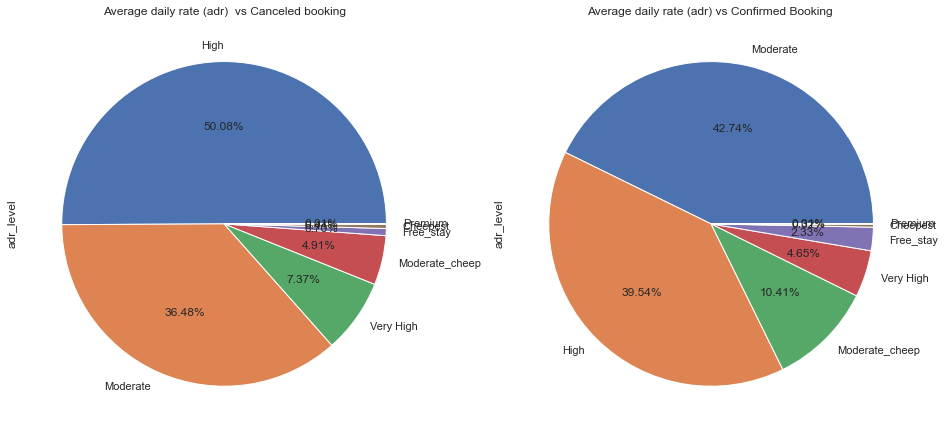

In [59]:
cancelled_1=df2[df2['is_canceled']==1]
not_cancelled_1=df2[df2['is_canceled']==0]

plt.figure(figsize=(16,12))
percentage_of_booking_nd_adr=cancelled_1['adr_level'].value_counts()/len(cancelled_1)*100
plt.subplot(1,2,1)
percentage_of_booking_nd_adr.plot(kind='pie',autopct='%1.2f%%')
plt.title("Average daily rate (adr)  vs Canceled booking")
print('Average daily rate (adr)  vs Canceled booking')
print(percentage_of_booking_nd_adr)


percentage_of_booking_nd_adrr=not_cancelled_1['adr_level'].value_counts()/len(not_cancelled_1)*100
plt.subplot(1,2,2)
percentage_of_booking_nd_adrr.plot(kind='pie',autopct='%1.2f%%')
plt.title("Average daily rate (adr) vs Confirmed Booking ")
print()
print('Average daily rate (adr) vs Confirmed Booking ')
print(percentage_of_booking_nd_adrr)

Customer type and cancellation

is_canceled          0      1
customer_type                
Contract          2623    512
Group              488     53
Transient        50201  21661
Transient-Party   9908   1783

The percentage of cancellation  is_canceled          0      1
customer_type                
Contract          4.15   2.13
Group             0.77   0.22
Transient        79.41  90.22
Transient-Party  15.67   7.43


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

<Figure size 1152x1008 with 0 Axes>

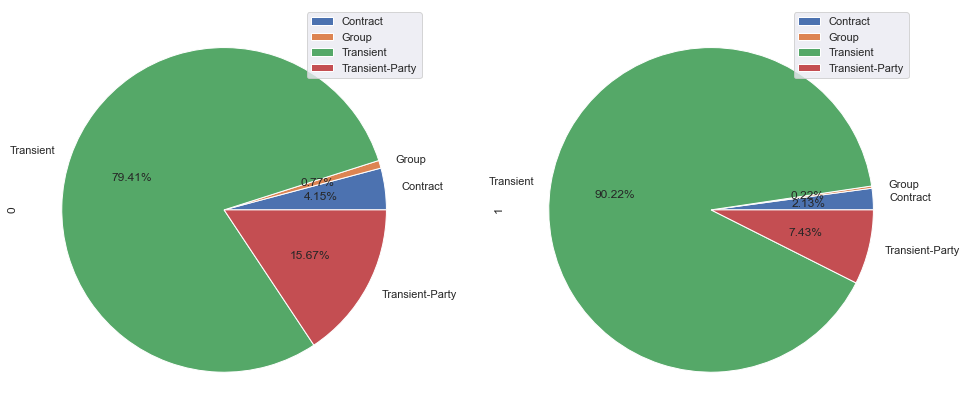

In [60]:
cus_type=pd.crosstab(df1['customer_type'],df1['is_canceled'])
print(cus_type)
print()

print('The percentage of cancellation ',cus_type.apply(lambda x : round((x/x.sum())*100,2) ,axis=0))

plt.figure(figsize=(16,14))
cus_type.plot(kind='pie',subplots=True,autopct='%1.2f%%')

Days_in_waiting_list  and Cancellation


In [61]:
len(cancelled)

24009

In [62]:
cancelled['days_in_waiting_list'].value_counts()

0      23715
31        11
39         9
63         8
46         8
       ...  
12         1
160        1
84         1
165        1
121        1
Name: days_in_waiting_list, Length: 105, dtype: int64

In [63]:
#we can see that  out of 24025 cancellation , 23731 had days in waiting list as 0.
#so We can clearly say that days in waiting list not a factor for cancellation

0     21555
1      1508
2       704
3       131
4        63
5        20
6        17
8         4
7         3
16        1
9         1
10        1
14        1
Name: booking_changes, dtype: int64


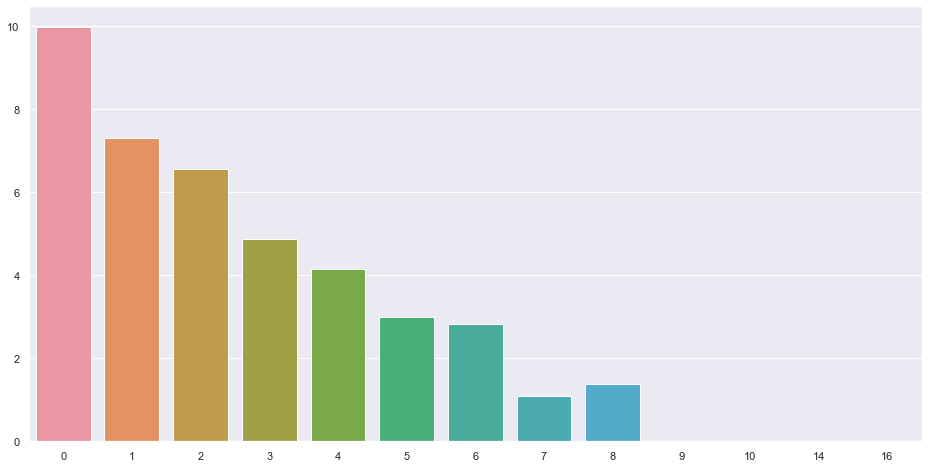

In [64]:
book_ch=cancelled['booking_changes'].value_counts()
print(book_ch)
x=book_ch.index
y=np.log(book_ch.values)
sns.barplot(x=x,y=y)
plt.show()

Room_type

In [65]:
room=df1[df1['reserved_room_type'] != df1['assigned_room_type']]
room.shape

(12989, 31)

For the customers who got differnt room 
0    12373
1      616
Name: is_canceled, dtype: int64


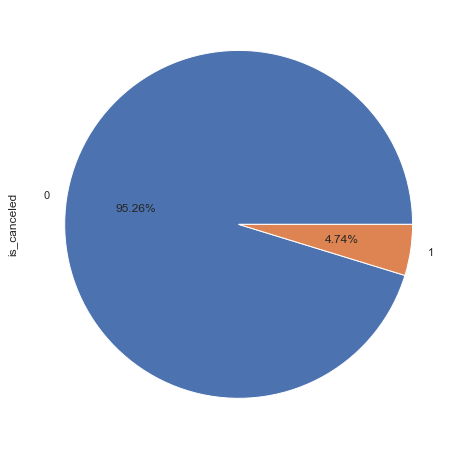

In [66]:
print('For the customers who got differnt room ')
print(room.is_canceled.value_counts())
room.is_canceled.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

Correlation

In [67]:
df1.skew()

is_canceled                        1.006471
lead_time                          1.430806
arrival_date_year                 -0.297219
arrival_date_week_number           0.022375
arrival_date_day_of_month          0.000271
stays_in_weekend_nights            1.340323
stays_in_week_nights               2.575562
adults                            20.394419
children                           3.459587
babies                            21.128311
is_repeated_guest                  4.793615
previous_cancellations            34.329456
previous_bookings_not_canceled    20.456047
booking_changes                    5.069509
agent                              1.106264
days_in_waiting_list              19.467142
adr                               11.018648
required_car_parking_spaces        3.488641
total_of_special_requests          1.082382
dtype: float64

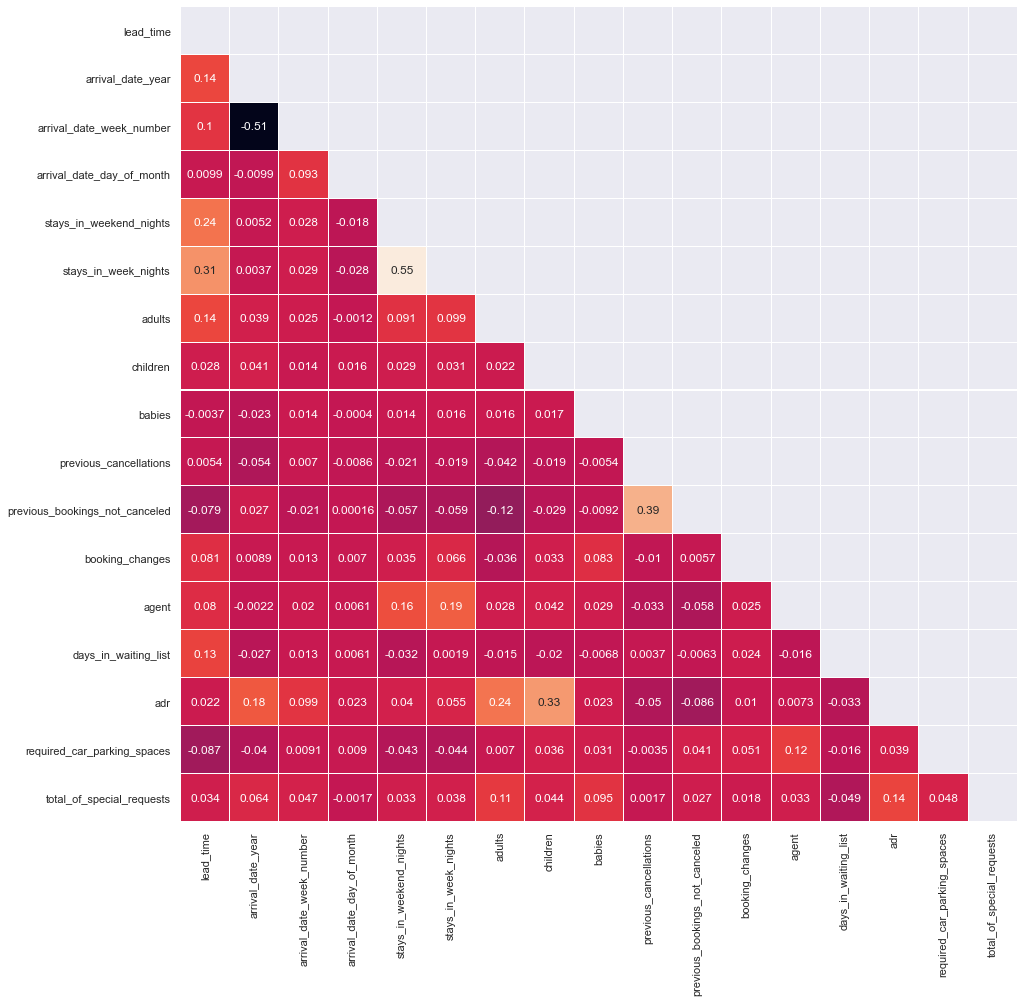

In [68]:
#Pearson Correlation

# sns.pairplot(data=df1,diag_kind='kde',hue=df1.is_canceled)
# plt.show()
correlation= df1.corr()
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

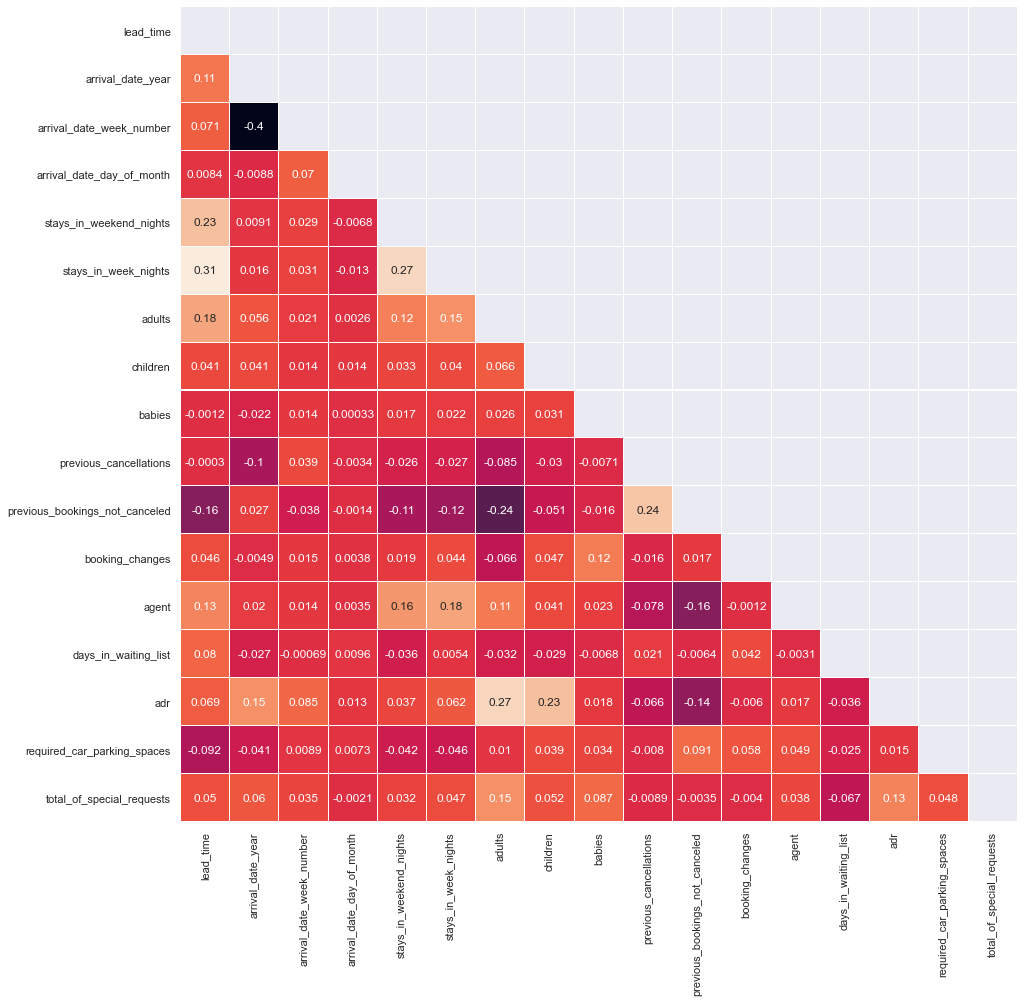

In [69]:
#Kendall correlation


correlation= df1.corr(method='kendall')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()


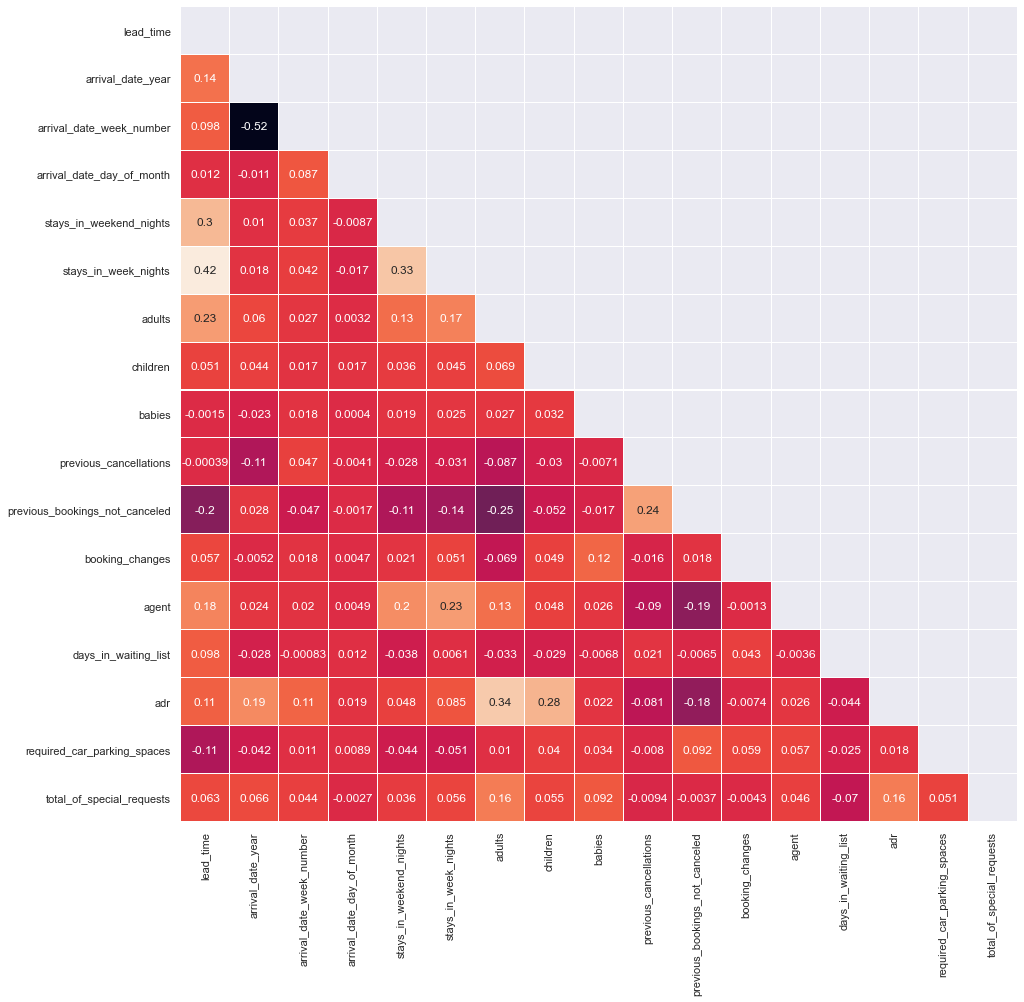

In [70]:
#Spearman
'''Spearman rank correlation: Spearman rank correlation is a non-parametric
test that is used to measure the degree of association between two variables.
The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is
the appropriate correlation analysis when the variables are measured on a scale that 
is at least ordinal.'''


correlation= df1.corr(method='spearman')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

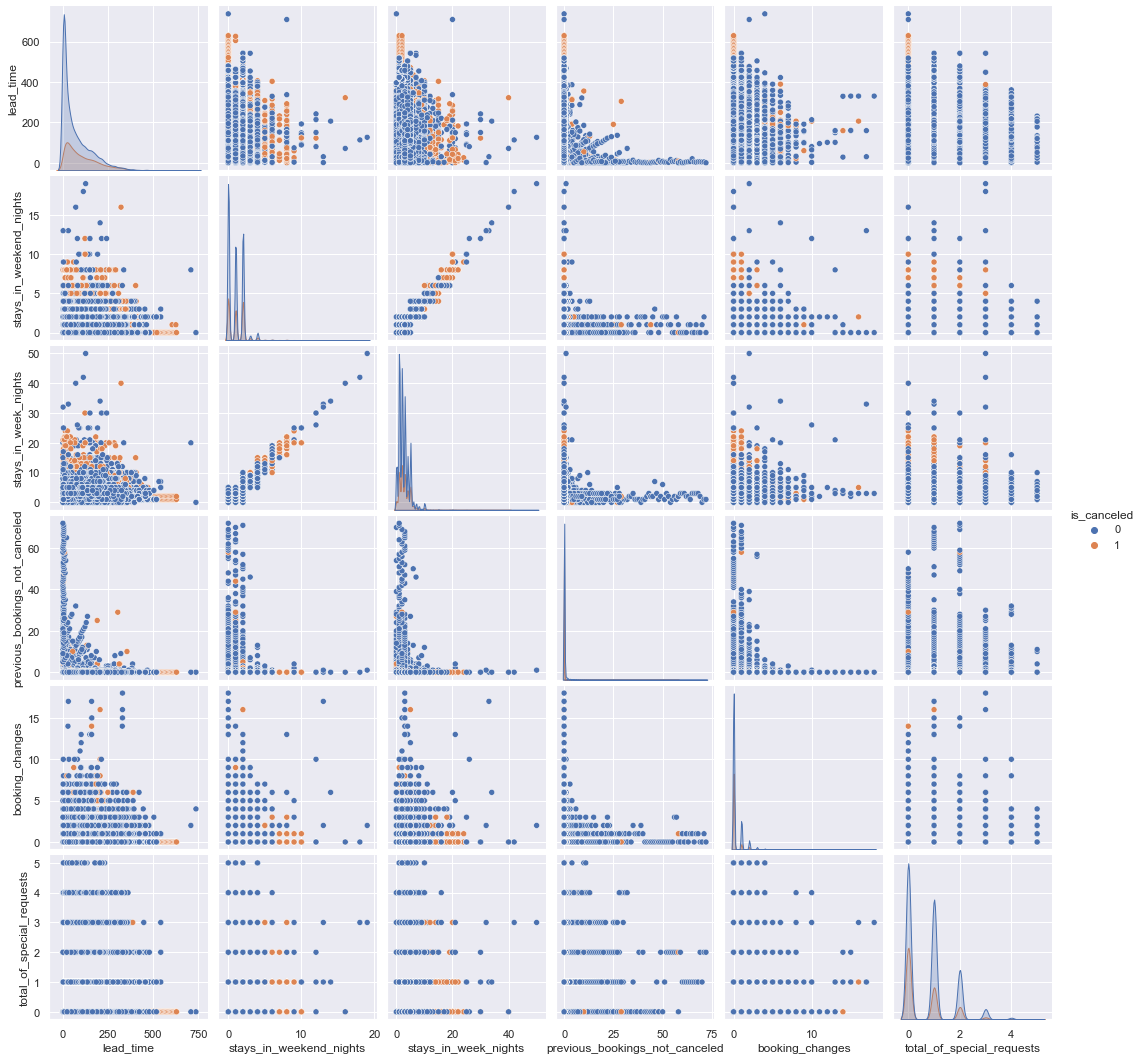

In [71]:
a=df1[['lead_time','stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled','booking_changes','total_of_special_requests','is_canceled']]
sns.pairplot(data=a,hue='is_canceled')
plt.show()


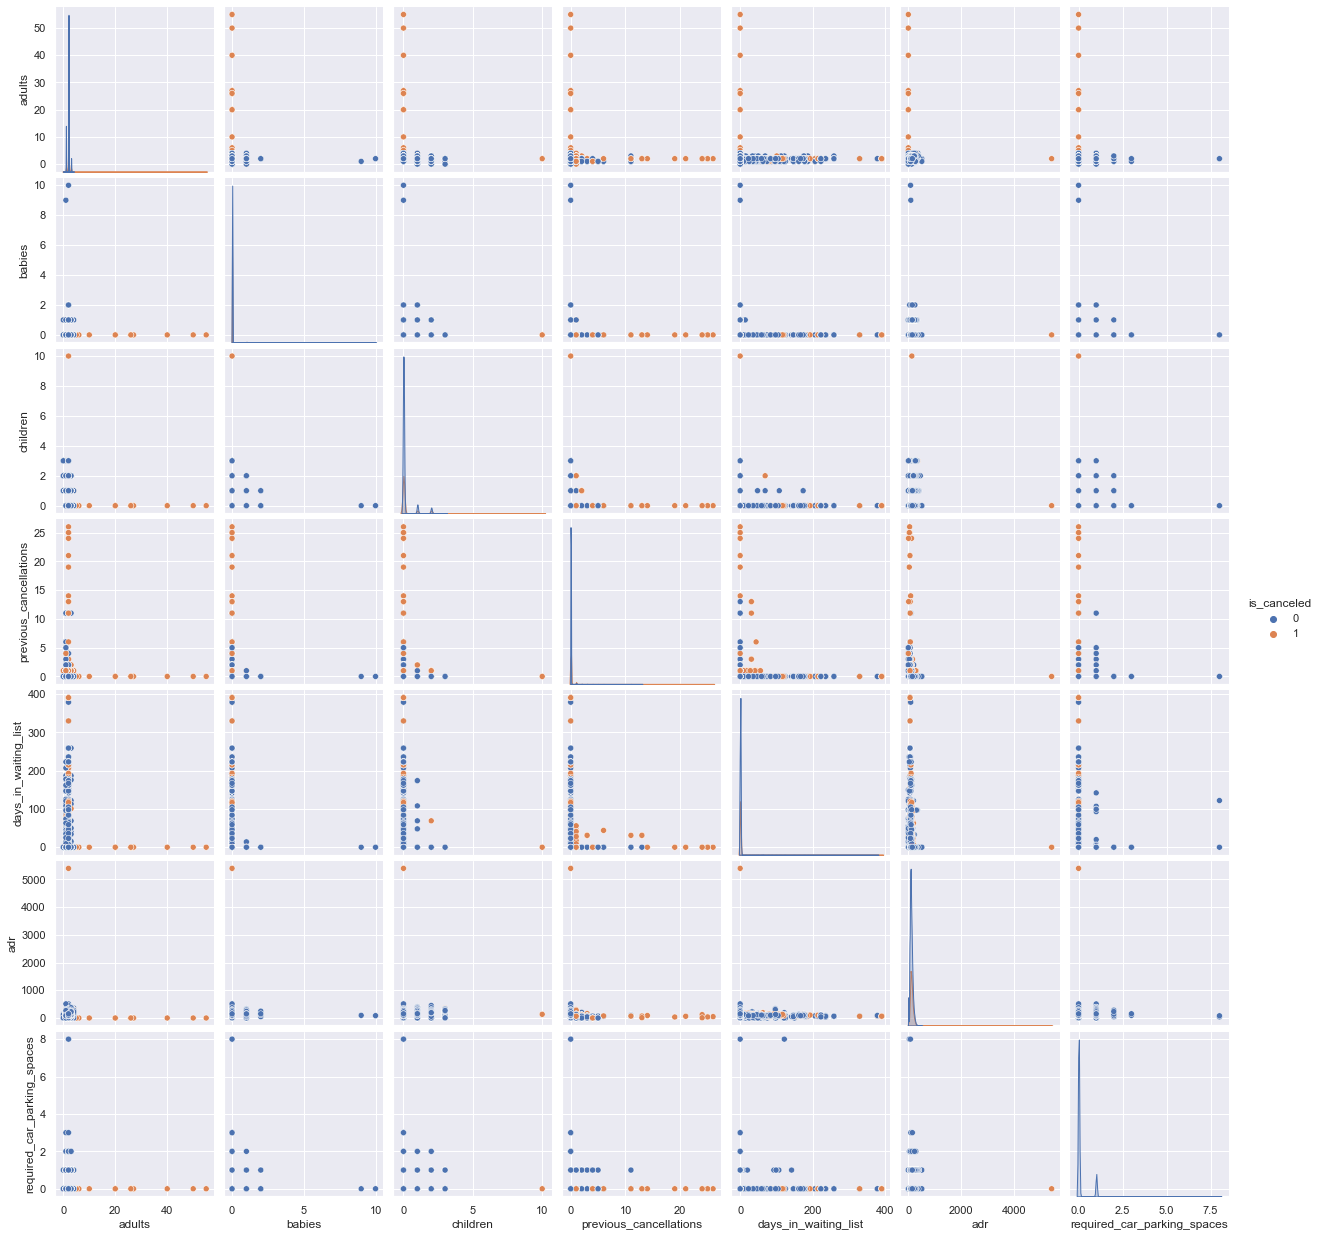

In [72]:
b=df1[['adults','babies','children','previous_cancellations','days_in_waiting_list','adr','required_car_parking_spaces','is_canceled']]
sns.pairplot(data=b,hue='is_canceled')


In [73]:
# sns.pairplot(df1.select_dtypes(np.number),hue='is_canceled')
# plt.show()

In [33]:
df1['arrival_date_year']=df1.arrival_date_year.astype('object')
df1['arrival_date_day_of_month']=df1.arrival_date_day_of_month.astype('object')
df1['agent']=df1['agent'].astype(object)

In [34]:
numerical=df1.select_dtypes(np.number)
categorical=df1.select_dtypes('object')
categorical.drop('reservation_status',axis=1,inplace=True)

In [35]:
numerical.columns

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [36]:
categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'customer_type'],
      dtype='object')

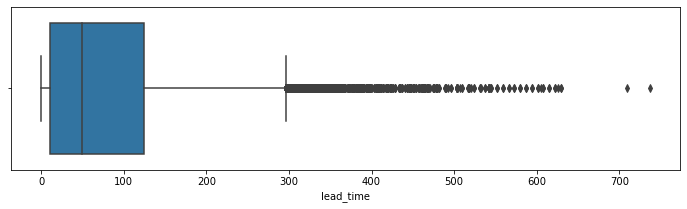

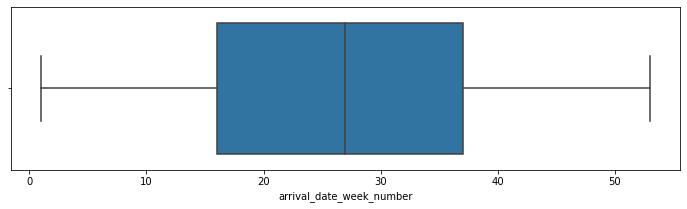

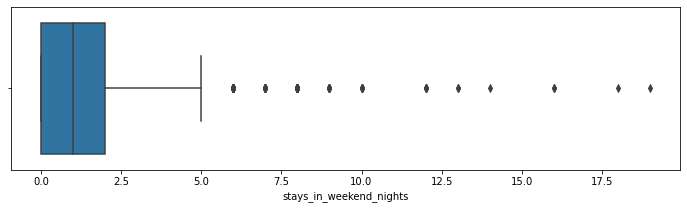

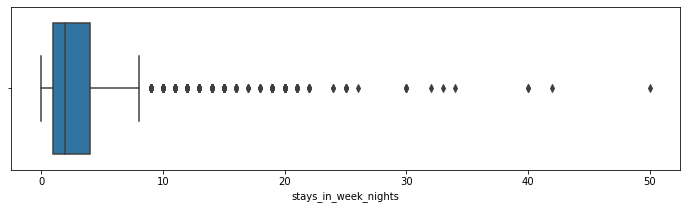

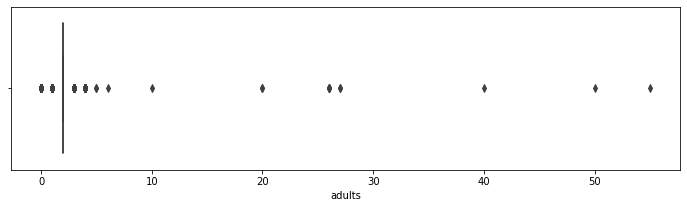

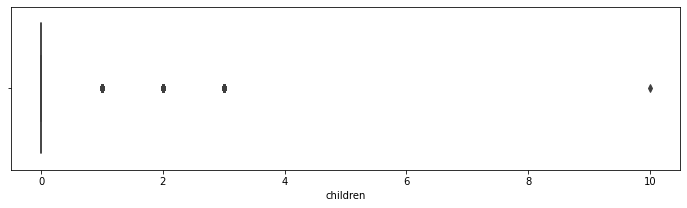

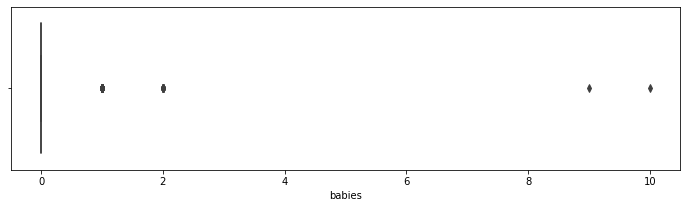

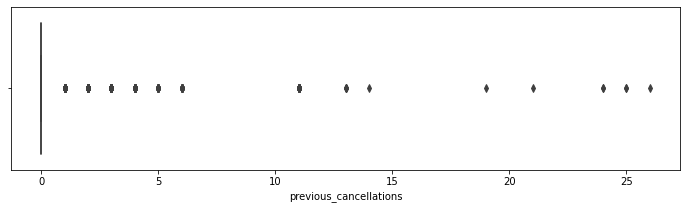

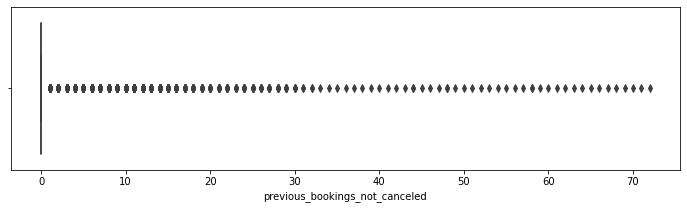

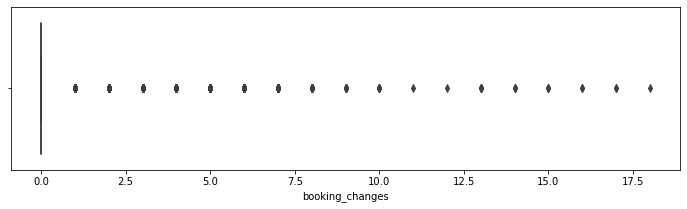

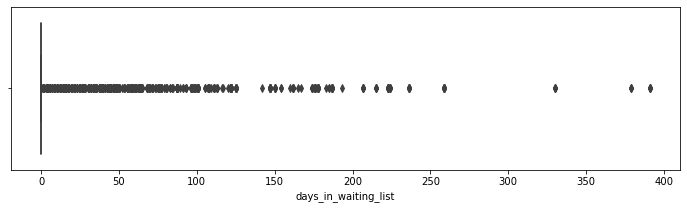

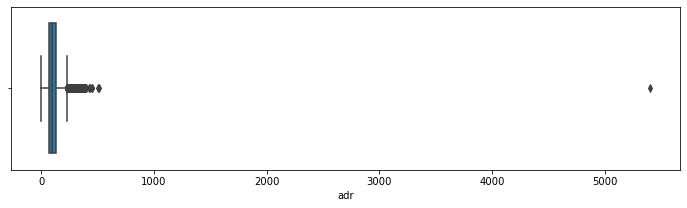

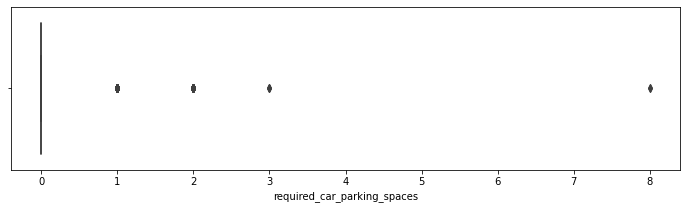

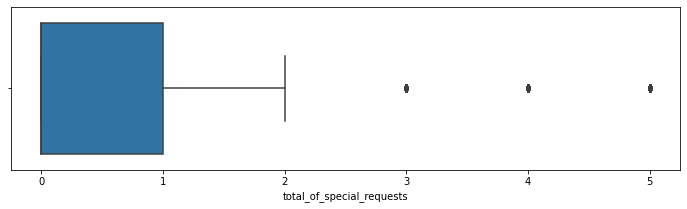

In [37]:
for i in numerical.columns:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=df1[i])
    plt.show()

In [39]:
numerical.shape

(87229, 14)

In [40]:
# calculate the first quartile
Q1 = numerical.quantile(0.25)

# calculate the third quartile
Q3 = numerical.quantile(0.75)


IQR = Q3 - Q1


df_out = numerical[~((numerical < (Q1 - 1.5 * IQR)) | (numerical > (Q3 + 1.5 * IQR))).any(axis=1)]


df_out = df_out.reset_index(drop = True)
df_out.shape

(39940, 14)

In [ ]:
# we will lose 47,289 records.

# Stats For significant Column
# Parametric Test

In [78]:

Stats=[]
pvalues=[]
Dof=[]
Expected_value=[]
import scipy.stats as st
for i in categorical.columns:
    observed_value=pd.crosstab(categorical[i],categorical['is_canceled'])
    stats,pvalue,dof,expected_value=st.chi2_contingency(observed_value)
    Stats.append(stats)
    pvalues.append(pvalue)
    Dof.append(dof)
    Expected_value.append(expected_value)
p_value=pd.DataFrame({"Columns":categorical.columns,'Pvalues':pvalues})


p_value

,Columns,Pvalues
0,hotel,7.284548e-101
1,is_canceled,0.000000e+00
2,arrival_date_year,9.962035e-148
3,arrival_date_month,1.475418e-129
4,arrival_date_day_of_month,4.387654e-05
5,meal,3.249800e-77
6,country,0.000000e+00
7,market_segment,0.000000e+00
8,distribution_channel,0.000000e+00
9,is_repeated_guest,3.480002e-151


𝐻0 : The variables are independent

𝐻1 : The variables are not independent (i.e. variables are dependent)

alpha=0.05
p value =0.0
since p value is less than alpha , we  reject Ho

that means  The variables are not independent (i.e. variables are dependent)
therefore all categorical features here are significant.

In [79]:
df1.is_canceled=df1.is_canceled.astype(np.number)
x=df1.select_dtypes(include='number')
X=x.drop('is_canceled',axis='columns')
y=x['is_canceled']
from sklearn.feature_selection import SelectKBest,f_classif
kbest=SelectKBest(f_classif,k=len(X.columns))
kbest.fit(X,y)

imp_ft=round(pd.DataFrame(kbest.pvalues_),2)
imp_ft['Columns']=X.columns
imp_ft

,0,Columns
0,0.00,lead_time
1,0.62,arrival_date_week_number
2,0.00,stays_in_weekend_nights
3,0.00,stays_in_week_nights
4,0.00,adults
5,0.00,children
6,0.00,babies
7,0.00,previous_cancellations
8,0.00,previous_bookings_not_canceled
9,0.00,booking_changes


# Outilier Checking
For first 8 columns

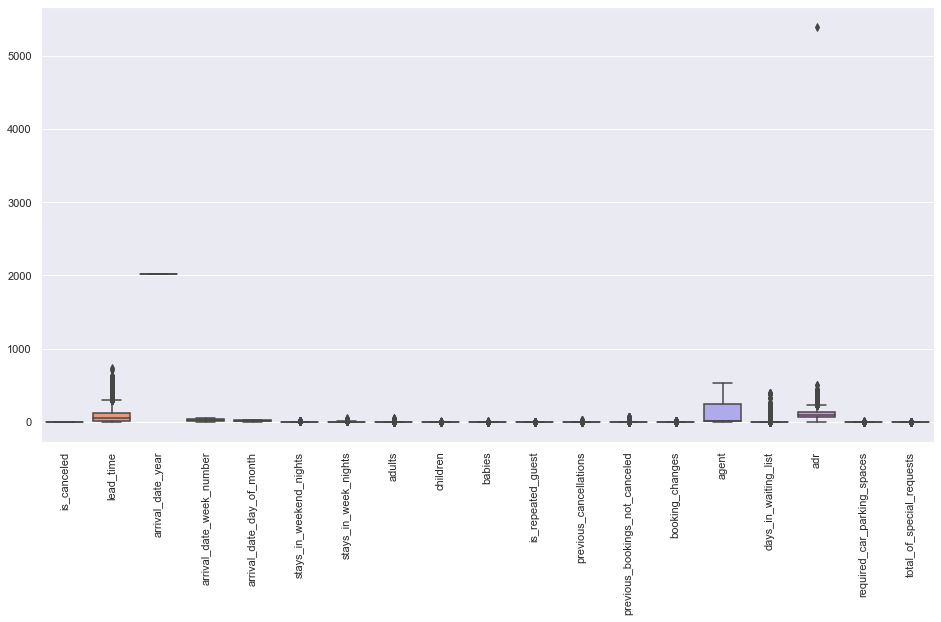

In [80]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()

In [81]:
# We can do the outlier treatment after building the  base model.

In [82]:
df1.kurt()

is_canceled                         -0.987040
lead_time                            2.123465
arrival_date_year                   -0.884009
arrival_date_week_number            -0.951588
arrival_date_day_of_month           -1.196160
stays_in_weekend_nights              7.075195
stays_in_week_nights                20.096851
adults                            1391.125194
children                            12.924945
babies                            1202.808162
is_repeated_guest                   20.979224
previous_cancellations            1725.615543
previous_bookings_not_canceled     578.968139
booking_changes                     53.996973
agent                               -0.073147
days_in_waiting_list               483.811995
adr                                992.262132
required_car_parking_spaces         21.708286
total_of_special_requests            0.819485
dtype: float64

# Normality Check

In [83]:
df1.skew()

is_canceled                        1.006471
lead_time                          1.430806
arrival_date_year                 -0.297219
arrival_date_week_number           0.022375
arrival_date_day_of_month          0.000271
stays_in_weekend_nights            1.340323
stays_in_week_nights               2.575562
adults                            20.394419
children                           3.459587
babies                            21.128311
is_repeated_guest                  4.793615
previous_cancellations            34.329456
previous_bookings_not_canceled    20.456047
booking_changes                    5.069509
agent                              1.106264
days_in_waiting_list              19.467142
adr                               11.018648
required_car_parking_spaces        3.488641
total_of_special_requests          1.082382
dtype: float64

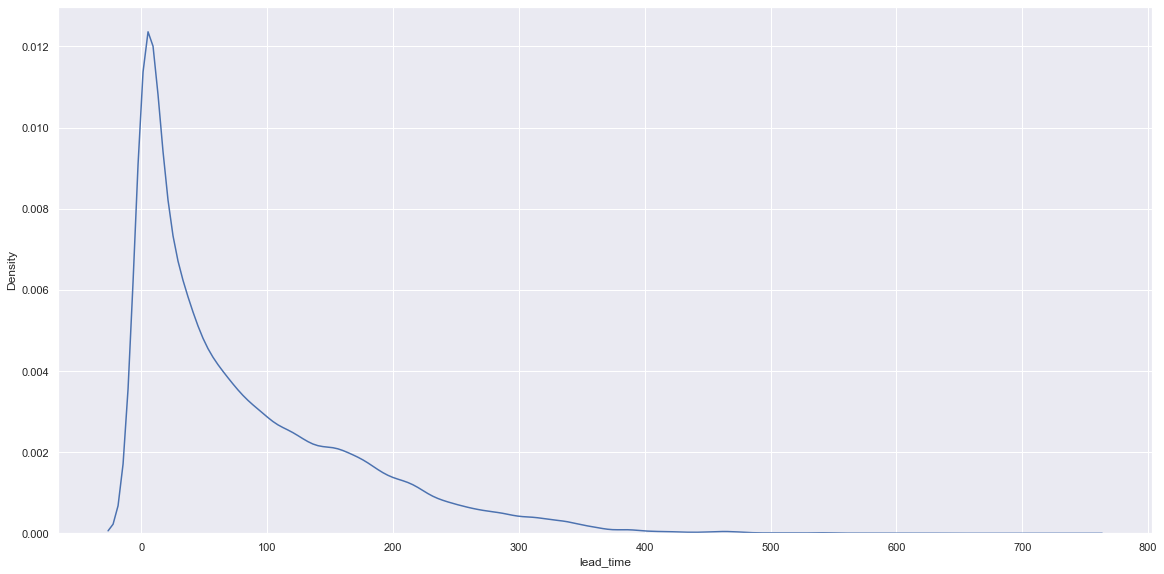

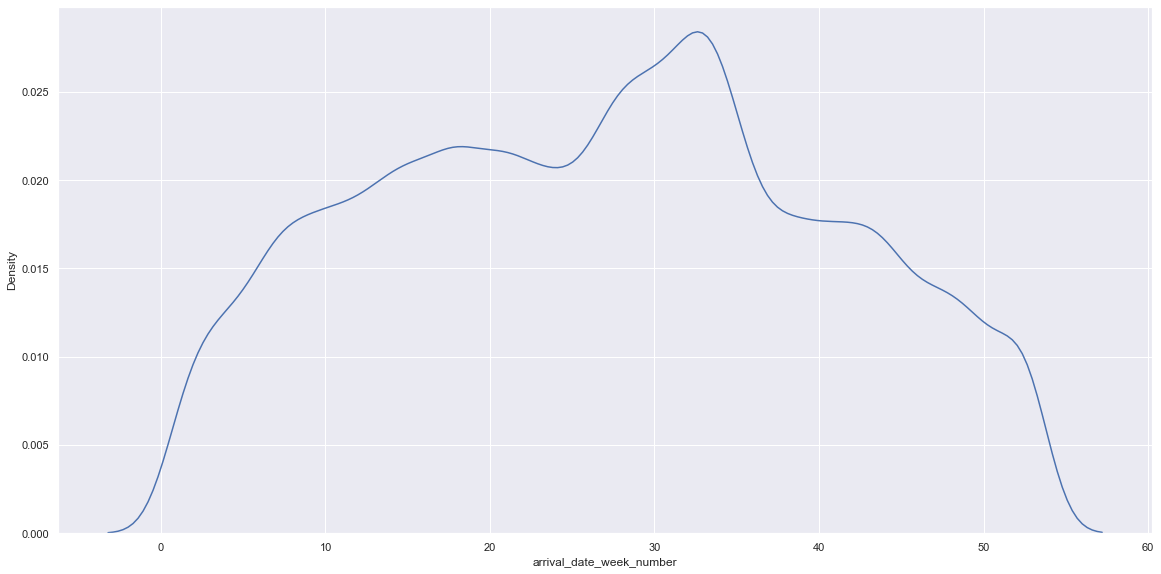

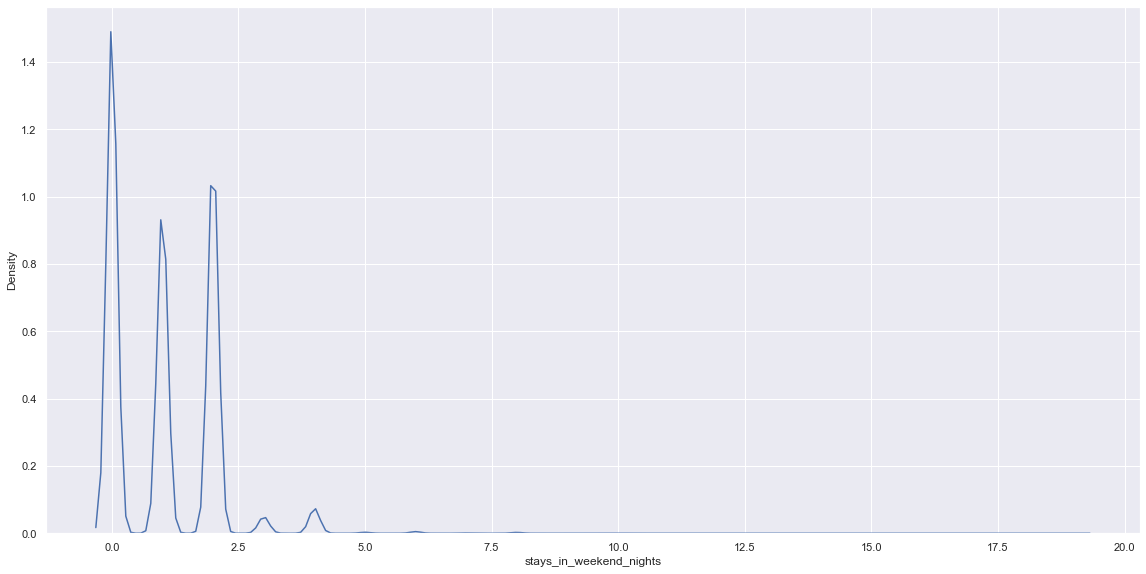

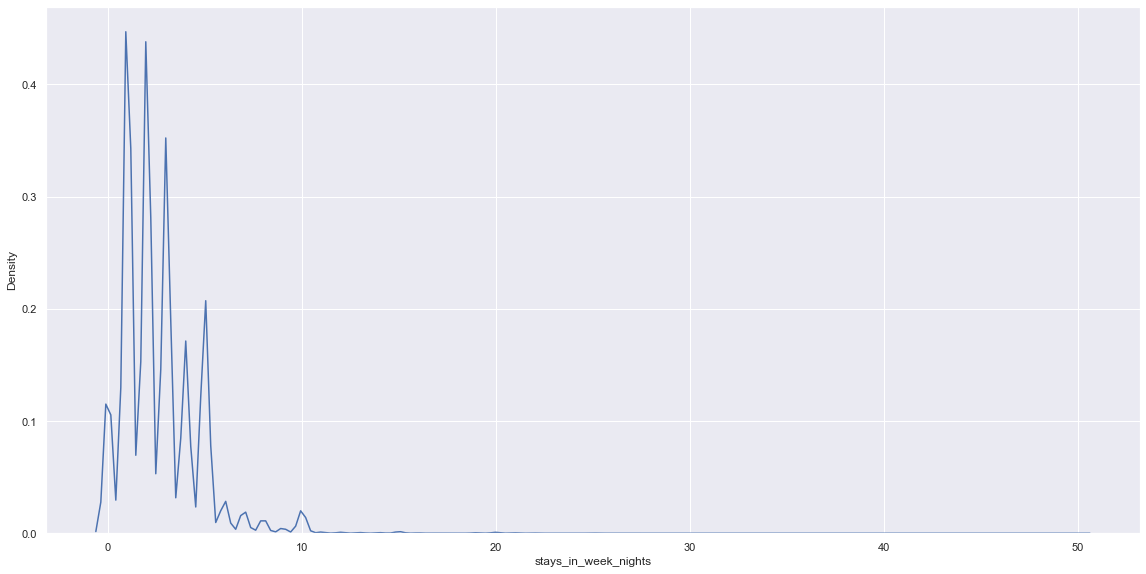

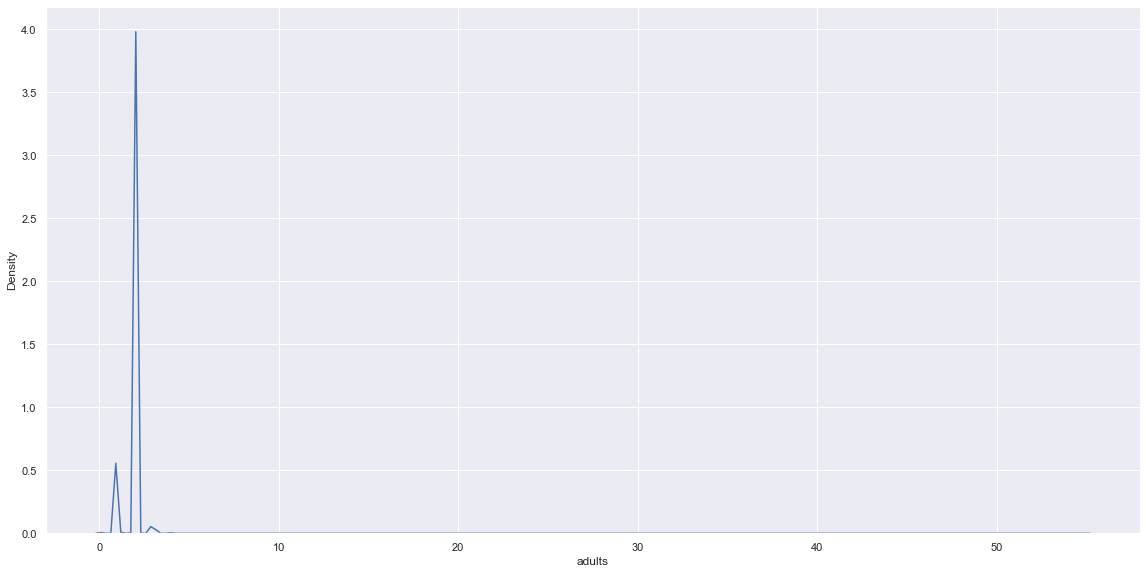

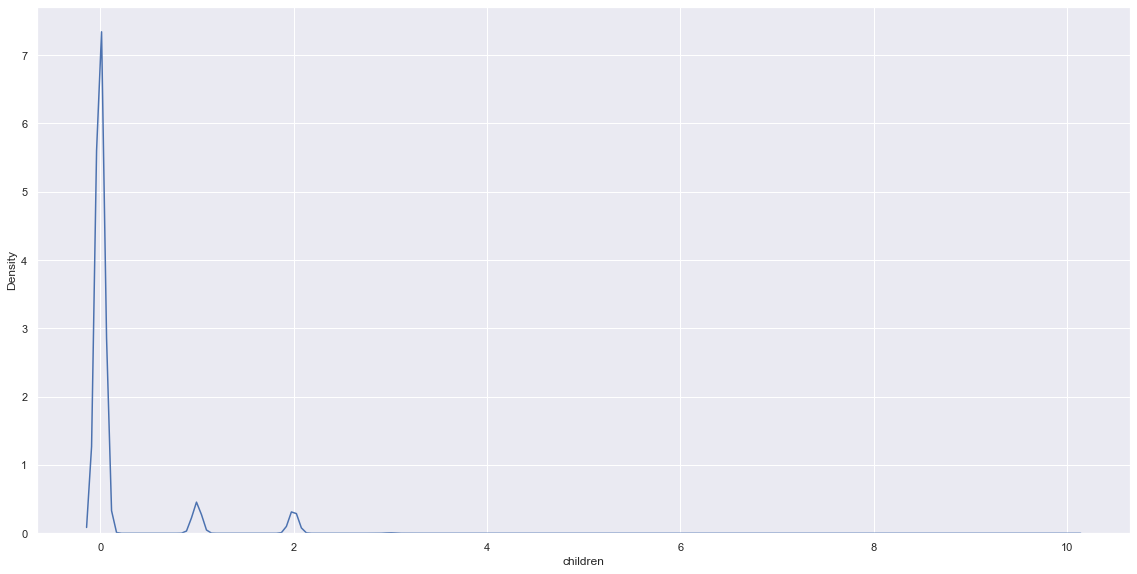

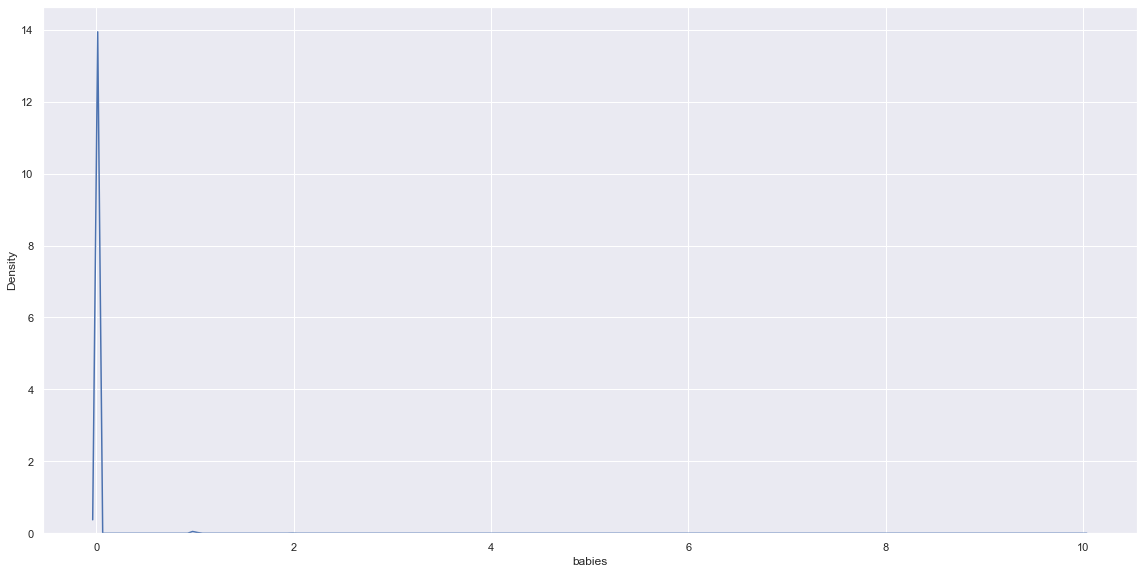

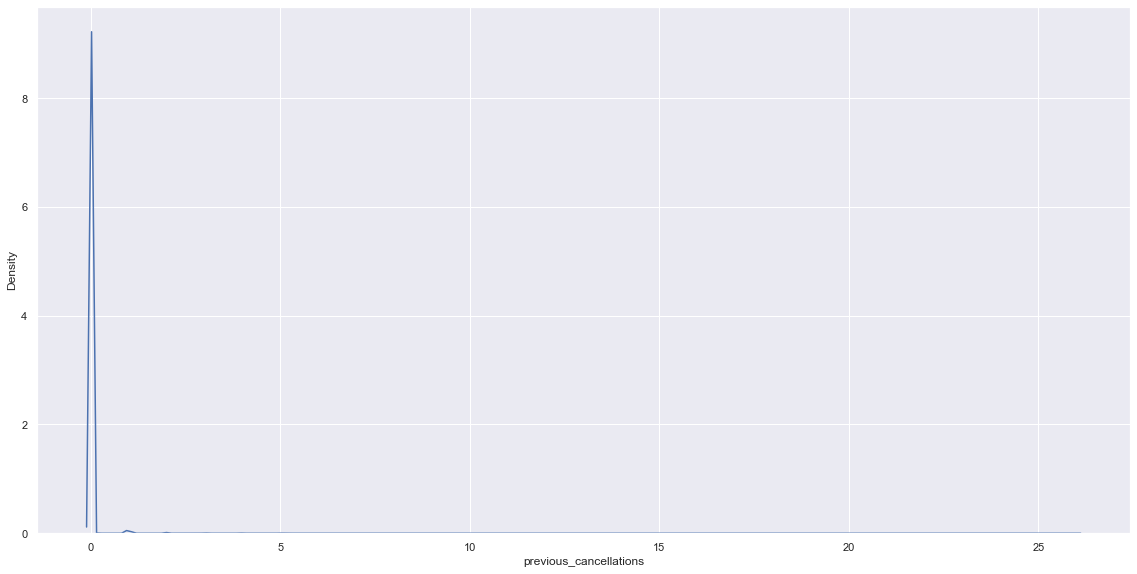

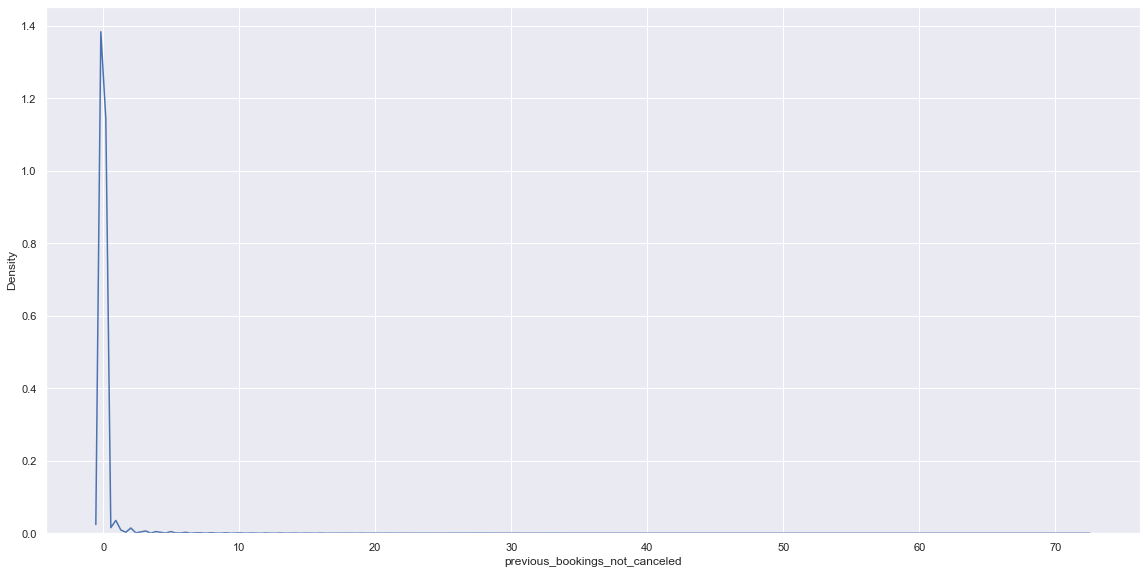

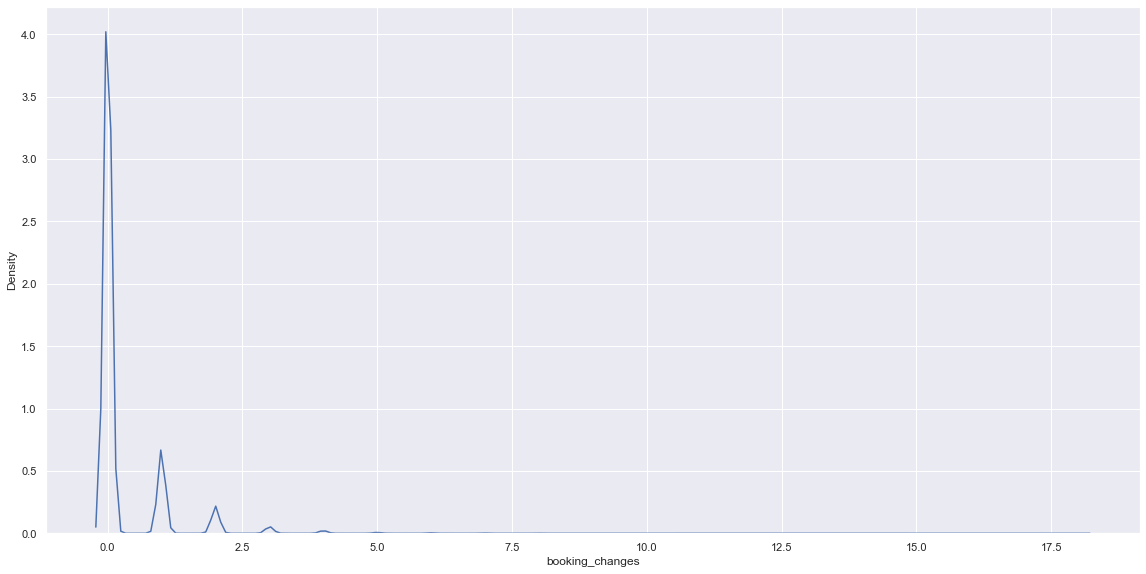

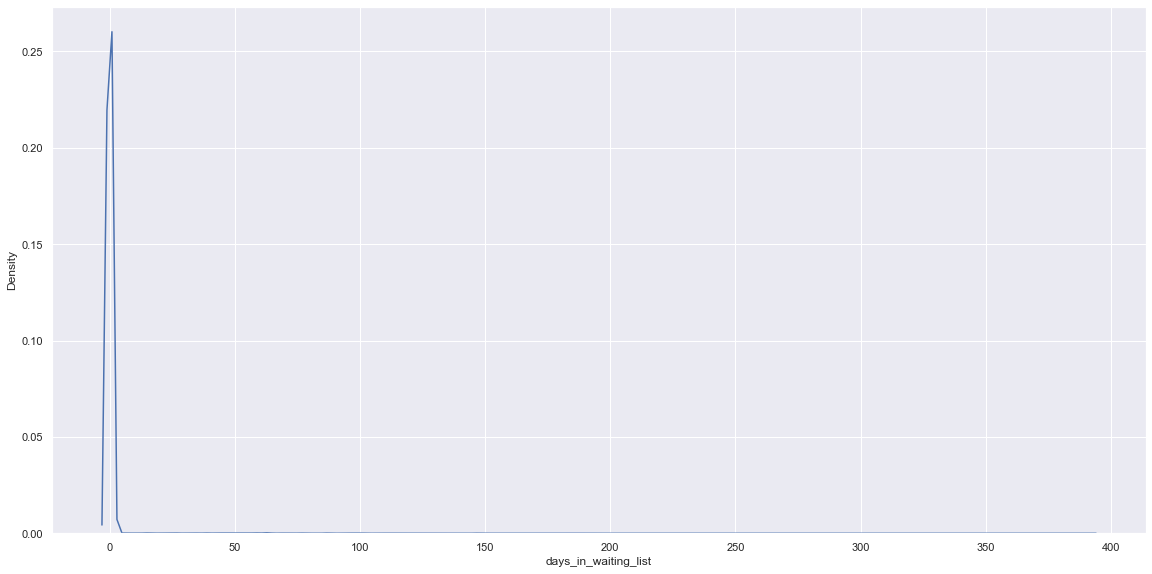

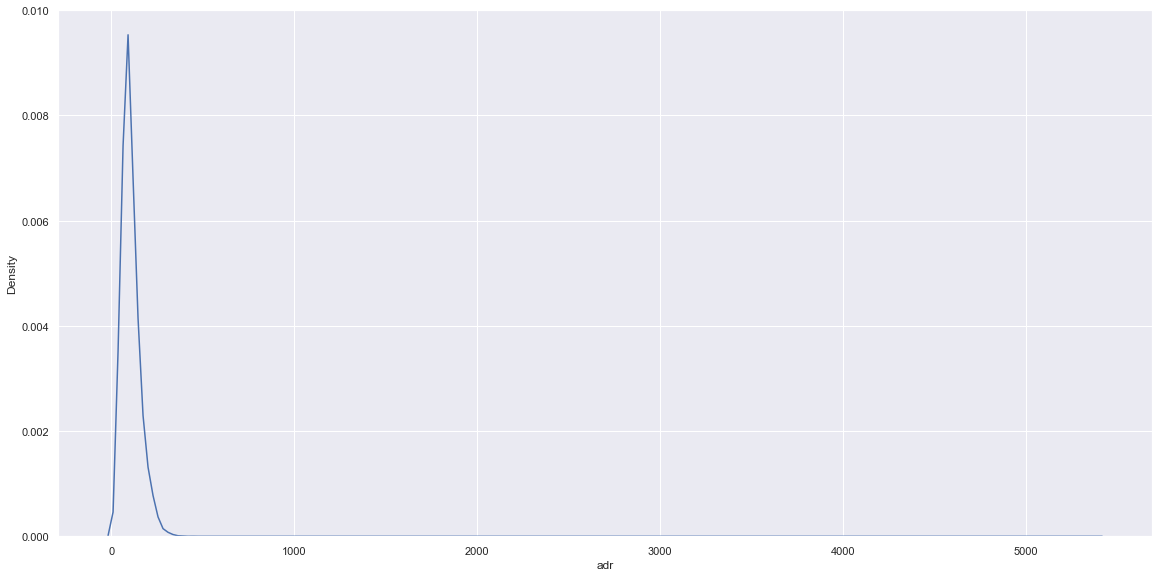

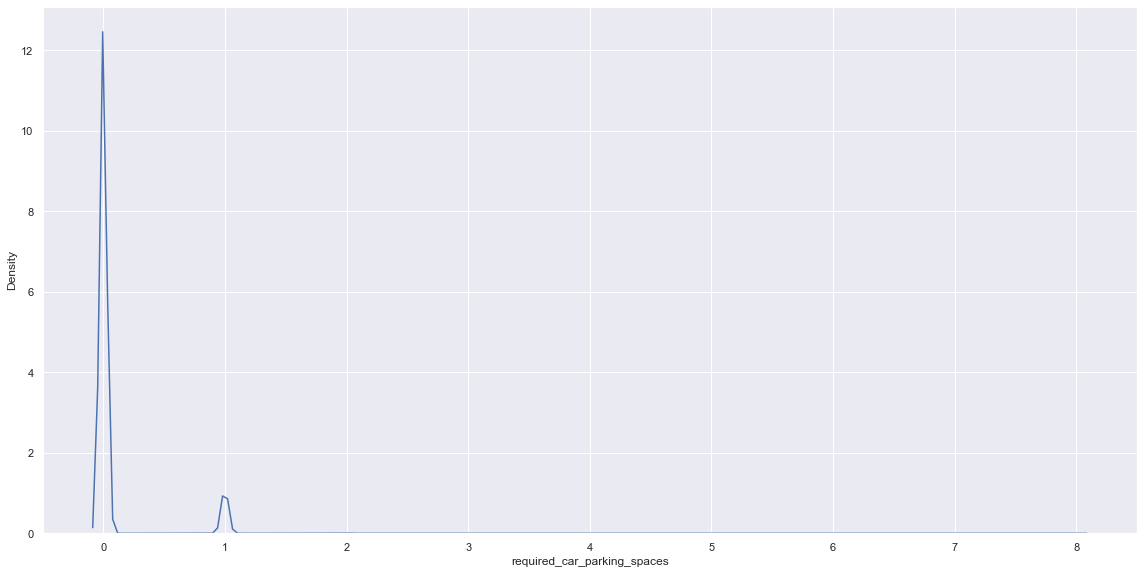

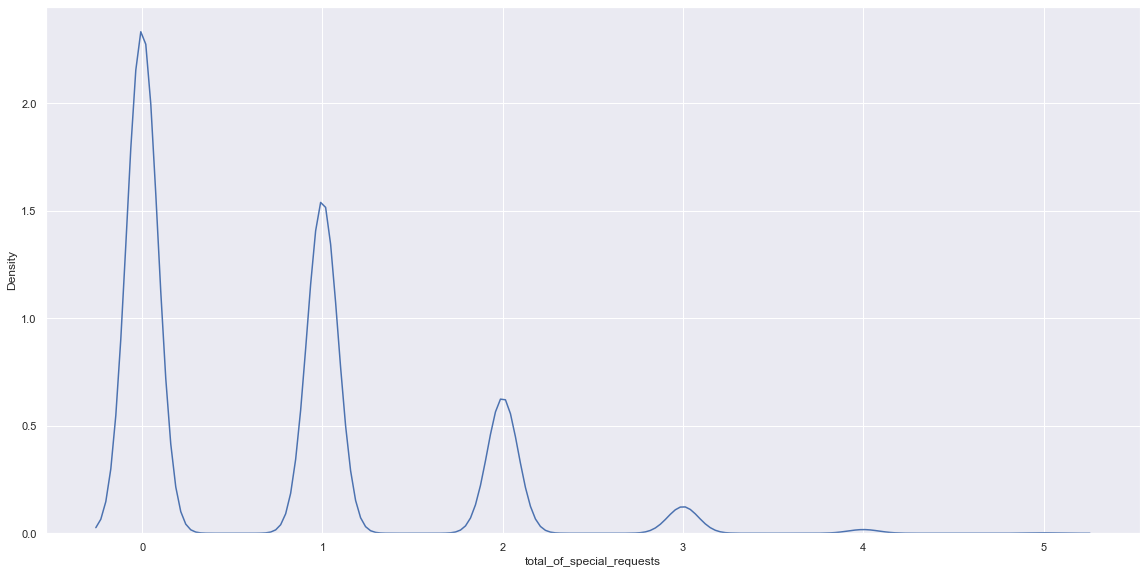

In [84]:

for i in numerical.columns:
    plt.subplots()
    plt.tight_layout()
    sns.kdeplot(numerical[i])
    

Data Imbalance Checking

<AxesSubplot:ylabel='is_canceled'>

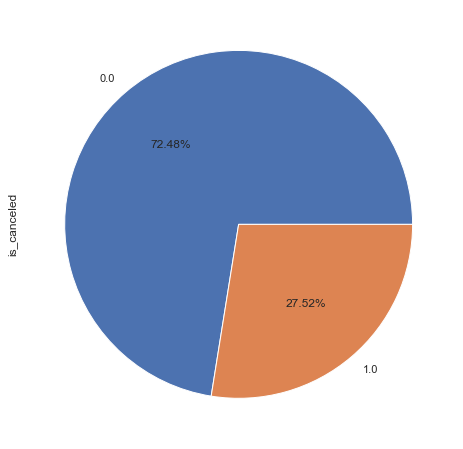

In [85]:
y.value_counts().plot(kind='pie',autopct='%1.2f%%')

# Feature Engineering

In [86]:
# -	Whether any transformations required
# -	Scaling the data
# -	Feature selection 
# -	Dimensionality reduction


In [87]:
dff=df1.copy()

Data Transformation

In [88]:
#Since our data is not normally distibuted  and 
#by transforming we can scale the values of different columns so that we cn make them compairable
#We can use Transformation techniques in our dataset

# (But we can do Transformation after building base model)

-	Feature selection 

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:

vif=pd.DataFrame()
vif['features']=numerical.columns
vif['vif']=[variance_inflation_factor(numerical.values,i) for i in range(numerical.shape[1])]
vif

,features,vif
0,lead_time,2.204575
1,arrival_date_week_number,4.065374
2,stays_in_weekend_nights,2.832391
3,stays_in_week_nights,3.931348
4,adults,6.913772
5,children,1.229457
6,babies,1.026206
7,previous_cancellations,1.192675
8,previous_bookings_not_canceled,1.204400
9,booking_changes,1.160025


In [91]:

# we can set a threshold value of 10 ,so that variables that have vif value greater than 10 can be removed.

In [92]:
#From chi-square test , we saw that all the categorical columns are significant.

# Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()




In [54]:
df1.country.value_counts(normalize=True)[:15]

PRT    0.313600
GBR    0.119490
FRA    0.101148
ESP    0.083046
DEU    0.061734
ITA    0.035092
IRL    0.034564
BEL    0.023857
BRA    0.022848
NLD    0.021896
USA    0.021449
CHE    0.017953
CN     0.012530
AUT    0.010856
SWE    0.009550
Name: country, dtype: float64

In [53]:
df1.agent.value_counts(normalize=True)[:15]

9.0      0.329260
240.0    0.149354
0.0      0.139185
14.0     0.038313
7.0      0.037763
250.0    0.031859
241.0    0.018847
28.0     0.017116
8.0      0.015855
1.0      0.014078
6.0      0.012805
40.0     0.011304
314.0    0.009676
242.0    0.008277
83.0     0.007039
85.0     0.005996
243.0    0.005468
171.0    0.004609
27.0     0.004517
3.0      0.004161
22.0     0.003944
11.0     0.003577
15.0     0.003462
Name: agent, dtype: float64

In [95]:
#we can take the top 5 countries and treat all others as seperate category.

In [50]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
    threshold_value=int(threshold*len(column))
    categories_list=[]
    s=0
    counts=Counter(column)
    for i,j in counts.most_common():
        s+=dict(counts)[i]
        categories_list.append(i)
        if s>=threshold_value:
            break
    categories_list.append('Other')
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column
transformed_column,new_category_list=cumulatively_categorise(categorical["country"],return_categories_list=True)
transformed_column.unique()

array(['PRT', 'GBR', 'Other', 'ESP', 'IRL', 'FRA', 'DEU', 'BEL', 'ITA'],
      dtype=object)

In [47]:
transformed_column.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Other', 'DEU', 'BEL',
       'CHE', 'ITA', 'NLD', 'BRA'], dtype=object)

In [102]:
categorical.drop('is_canceled',axis=1,inplace=True)

In [99]:
numerical.columns

Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [103]:
categorical.columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'customer_type'],
      dtype='object')

In [104]:
y=df1.is_canceled

In [ ]:
categorical.shape

In [ ]:
# dummy=pd.get_dummies(categorical,drop_first=True)

# dummy.shape

In [ ]:
# X=pd.concat([numerical,dummy],axis=1)
# X.shape

In [105]:
cat1=categorical.copy()

In [106]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

for col in categorical.columns:
    cat1[col]=ll.fit_transform(categorical[col])

cat1.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type
0,1,0,5,0,0,135,3,1,0,2,2,0,0,2
1,1,0,5,0,0,135,3,1,0,2,2,0,0,2
2,1,0,5,0,0,59,3,1,0,0,2,0,0,2
3,1,0,5,0,0,59,2,0,0,0,0,0,221,2
4,1,0,5,0,0,59,6,3,0,0,0,0,174,2


In [107]:
cat1.shape

(87229, 14)

In [108]:
X_1=pd.concat([numerical,cat1],axis=1)
X_1.shape

(87229, 28)

In [109]:
def plot_confusion_matrix(model):
    
    y_pred = model.predict(x_test)

    cm = confusion_matrix(yy_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])

    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    
    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [110]:
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(yy_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
# plot_roc(model)

# Base Model

# 1 Logistic Regression


In [111]:
# #Using get_dummies

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# lor=LogisticRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# lor = LogisticRegression()

# lor.fit(X_train, y_train)
# y_train_pred = lor.predict(X_train)
# y_train_prob = lor.predict_proba(X_train)

# print('Train - results')
# print(confusion_matrix(y_train, y_train_pred))
# print(accuracy_score(y_train, y_train_pred))
# print(classification_report(y_train, y_train_pred))

# y_test_pred = lor.predict(X_test)
# y_test_prob = lor.predict_proba(X_test)

# print('\n')
# print('Test - results')
# print(confusion_matrix(y_test, y_test_pred))
# print(accuracy_score(y_test, y_test_pred))
# print(classification_report(y_test, y_test_pred))

In [113]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [115]:
#using Label Encoder

logreg=LogisticRegression()
x_train, x_test, yy_train, yy_test = train_test_split(X_1, y, test_size=0.2, random_state=10)

logreg.fit(x_train, yy_train)
yy_train_pred = logreg.predict(x_train)
yy_train_prob = logreg.predict_proba(x_train)

print('Train - results')
print()
print(confusion_matrix(yy_train, yy_train_pred))
print(accuracy_score(yy_train, yy_train_pred))
print(classification_report(yy_train, yy_train_pred))

yy_test_pred = logreg.predict(x_test)
yy_test_prob = logreg.predict_proba(x_test)

print('\n')
print('Test - results')
print()
print(confusion_matrix(yy_test, yy_test_pred))
print()
print(accuracy_score(yy_test, yy_test_pred))
print()
print(classification_report(yy_test, yy_test_pred))

Train - results

[[47203  3380]
 [14372  4828]]
0.7456113953255091
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84     50583
         1.0       0.59      0.25      0.35     19200

    accuracy                           0.75     69783
   macro avg       0.68      0.59      0.60     69783
weighted avg       0.72      0.75      0.71     69783



Test - results

[[11807   830]
 [ 3596  1213]]

0.7463028774504185

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84     12637
         1.0       0.59      0.25      0.35      4809

    accuracy                           0.75     17446
   macro avg       0.68      0.59      0.60     17446
weighted avg       0.72      0.75      0.71     17446



In [116]:
plot_confusion_matrix(logreg)

NameError: name 'ListedColormap' is not defined

In [ ]:
plot_roc(logreg)

In [117]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(yy_test, yy_test_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.22699296342918485


# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree = decision_tree.fit(x_train, yy_train)

y_pred_dt = decision_tree.predict(x_test)

print("Testing Accuracy:",accuracy_score(yy_test, y_pred_dt))

y_pred_train_dt=decision_tree.predict(x_train)



print()

print('Test Report')
print(classification_report(yy_test, y_pred_dt))


print('Train Report')
print(classification_report(yy_train, y_pred_train_dt))


Testing Accuracy: 0.7946807291069586

Test Report
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     12637
         1.0       0.62      0.64      0.63      4809

    accuracy                           0.79     17446
   macro avg       0.74      0.75      0.75     17446
weighted avg       0.80      0.79      0.80     17446

Train Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50583
         1.0       1.00      0.99      1.00     19200

    accuracy                           1.00     69783
   macro avg       1.00      1.00      1.00     69783
weighted avg       1.00      1.00      1.00     69783



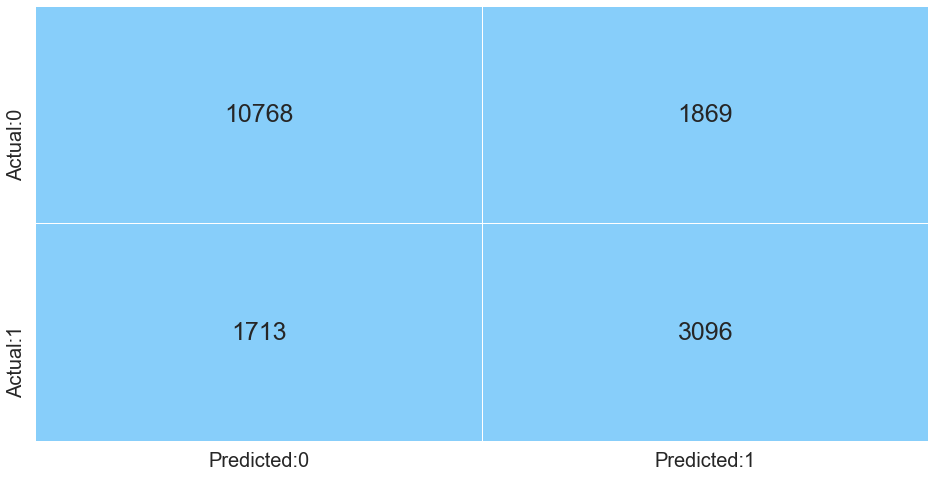

In [119]:
from matplotlib.colors import ListedColormap
plot_confusion_matrix(decision_tree)

In [ ]:
# TN = cm[0][0]
# TP = cm[1][1]
# FP = cm[0][1]
# FN = cm[1][0]

# total = TN + TP + FP + FN


# correct_classified_percentage = ((TN+TP)/total)*100
# print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# misclassified_percentage = ((FP+FN)/total)*100
# print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))


# print(accuracy_score(y_test, y_test_pred))


# specificity = TN/(TN+FP)
# print("\nSpecificity (Recall): ", round(specificity, 4))

# sensitivity = TP/(TP+FN)
# print("Sensitivity  : ", round(sensitivity, 4))



# print('kappa value:',kappa)

# KNN

In [130]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [131]:
numerical_nw=numerical.copy()

In [132]:
#Standardisation

ss=StandardScaler()

for i in numerical_nw.columns:
    numerical_nw[i]=ss.fit_transform(numerical_nw[[i]])
    
numerical_nw

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.044817,0.012050,-0.977823,-1.286346,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,3.843921,-0.074623,-1.940600,-0.299323,-0.840026
1,7.634756,0.012050,-0.977823,-1.286346,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,5.251166,-0.074623,-1.940600,-0.299323,-0.840026
2,-0.847915,0.012050,-0.977823,-0.796101,-1.414396,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,-0.574228,-0.299323,-0.840026
3,-0.778194,0.012050,-0.977823,-0.796101,-1.414396,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,-0.574228,-0.299323,-0.840026
4,-0.766574,0.012050,-0.977823,-0.305857,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,-0.155208,-0.299323,0.361828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.661993,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,-0.189094,-0.299323,-0.840026
119386,0.255994,0.597312,0.968918,1.164877,1.802467,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,2.166349,-0.299323,1.563682
119387,-0.534172,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,0.932607,-0.299323,3.967391
119388,0.337335,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,-0.074623,-0.038610,-0.299323,-0.840026


In [133]:
X_scaled=pd.concat([numerical_nw,cat1],axis=1)
X_scaled

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type
0,3.044817,0.012050,-0.977823,-1.286346,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,3.843921,...,0,135,3,1,0,2,2,0,0,2
1,7.634756,0.012050,-0.977823,-1.286346,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,5.251166,...,0,135,3,1,0,2,2,0,0,2
2,-0.847915,0.012050,-0.977823,-0.796101,-1.414396,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,59,3,1,0,0,2,0,0,2
3,-0.778194,0.012050,-0.977823,-0.796101,-1.414396,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,59,2,0,0,0,0,0,221,2
4,-0.766574,0.012050,-0.977823,-0.305857,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,59,6,3,0,0,0,0,174,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.661993,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,15,5,3,0,0,0,0,272,2
119386,0.255994,0.597312,0.968918,1.164877,1.802467,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,56,6,3,0,4,4,0,9,2
119387,-0.534172,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,43,6,3,0,3,3,0,9,2
119388,0.337335,0.597312,0.968918,1.164877,0.194035,-0.304426,-0.09538,-0.082315,-0.106192,-0.377813,...,0,59,6,3,0,0,0,0,78,2


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier()

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

# fit the model using fit() on train data
knn_model = knn_classification.fit(x_train_knn, y_train_knn)

# predict the attrition for test set
y_pred_knn = knn_model.predict(x_test_knn)
y_pred_knn_train = knn_model.predict(x_train_knn)
print('Test Report')
print()
print("Accuracy:",accuracy_score(y_test_knn, y_pred_knn))

print(classification_report(y_test_knn,y_pred_knn))
print()

print('Train Report')
print()
print("Accuracy:",accuracy_score(y_train_knn, y_pred_knn_train))

print(classification_report(y_train_knn,y_pred_knn_train))

Test Report

Accuracy: 0.764243952768543
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84     12637
         1.0       0.58      0.52      0.55      4809

    accuracy                           0.76     17446
   macro avg       0.70      0.69      0.70     17446
weighted avg       0.76      0.76      0.76     17446


Train Report

Accuracy: 0.8481721909347549
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     50583
         1.0       0.75      0.67      0.71     19200

    accuracy                           0.85     69783
   macro avg       0.81      0.79      0.80     69783
weighted avg       0.84      0.85      0.85     69783



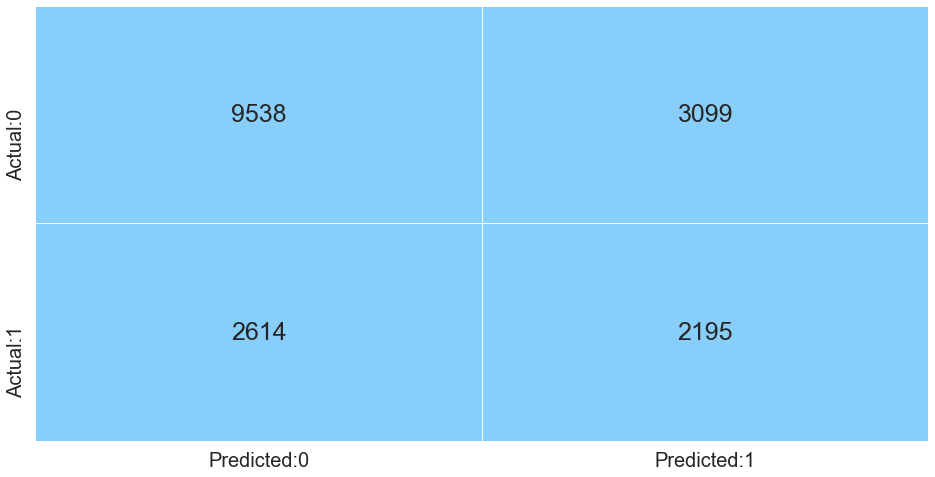

In [135]:
plot_confusion_matrix(knn_model)

In [ ]:
kappa = cohen_kappa_score(y_test_knn, y_pred_knn)

print('kappa value :',kappa)

In [137]:
#RF


from sklearn.ensemble import RandomForestClassifier


# type your code here
rf_classification = RandomForestClassifier()

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, yy_train)

# predict the attrition for test set
y_pred_train = rf_model.predict(x_train)

y_pred_test = rf_model.predict(x_test)

# generate a classification report
print(classification_report(yy_test, y_pred_test))

print()

print(classification_report(yy_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     12637
         1.0       0.77      0.66      0.71      4809

    accuracy                           0.85     17446
   macro avg       0.82      0.79      0.80     17446
weighted avg       0.85      0.85      0.85     17446


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50583
         1.0       1.00      0.99      1.00     19200

    accuracy                           1.00     69783
   macro avg       1.00      1.00      1.00     69783
weighted avg       1.00      1.00      1.00     69783



In [138]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(yy_test, y_pred_test)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6105706666807913


In [139]:
####################################################################################################

In [140]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
models = []
models.append(('Logistic', LR))
models.append(('Knn', KNN))
models.append(('DT', DT))
models.append(('RandomForest', RF))
models.append(('AdaBoost', AB))
models.append(('gradBoost', GB))

In [142]:
models

[('Logistic', LogisticRegression()),
 ('Knn', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('AdaBoost', AdaBoostClassifier()),
 ('gradBoost', GradientBoostingClassifier())]

Model-Name  - Logistic Bias Error - 0.25361976128757696 Varience Error  - 0.004728242545031782
Model-Name  - Knn Bias Error - 0.26172483675049263 Varience Error  - 0.0036602942783075724
Model-Name  - DT Bias Error - 0.2001168883480806 Varience Error  - 0.004152568955929441
Model-Name  - RandomForest Bias Error - 0.14818463251350128 Varience Error  - 0.003718976555187159
Model-Name  - AdaBoost Bias Error - 0.18896233493107423 Varience Error  - 0.004302270013767712
Model-Name  - gradBoost Bias Error - 0.17032174992862306 Varience Error  - 0.004734770782043264


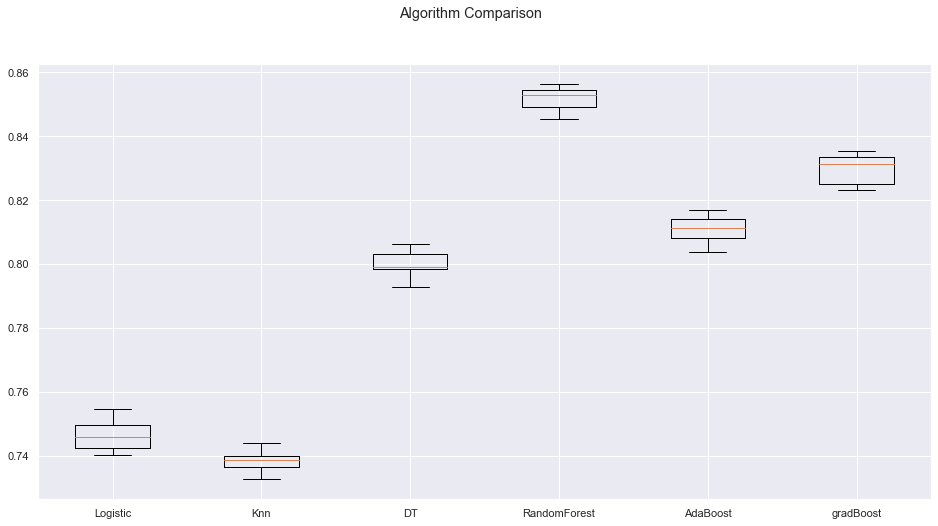

In [143]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=10,random_state=10)
    cv_results = cross_val_score(model, X_1, y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("Model-Name  -",name,'Bias Error -', np.mean(1-cv_results),'Varience Error  -',np.std(cv_results,ddof=1))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [145]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=10,random_state=10)
    cv_results = cross_val_score(model, X_1, y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("Model-Name  -",name,'Bias Error -', np.mean(1-cv_results),'Varience Error  -',np.std(cv_results,ddof=1))
    
    
    model1=model.fit(x_train,yy_train)
    y_pred=model1.predict(x_test)
    
    print("Accuracy score::- \n",accuracy_score(yy_test,y_pred))
    print()
    print("AUC SCORE::- \n",roc_auc_score(yy_test,y_pred))
    print()
    print("Classification Report \n",classification_report(yy_test,y_pred))
    


Model-Name  - Logistic Bias Error - 0.25361976128757696 Varience Error  - 0.004728242545031782
Accuracy score::- 
 0.7463028774504185

AUC SCORE::- 
 0.5932776231846024

Classification Report 
               precision    recall  f1-score   support

         0.0       0.77      0.93      0.84     12637
         1.0       0.59      0.25      0.35      4809

    accuracy                           0.75     17446
   macro avg       0.68      0.59      0.60     17446
weighted avg       0.72      0.75      0.71     17446

Model-Name  - Knn Bias Error - 0.26172483675049263 Varience Error  - 0.0036602942783075724
Accuracy score::- 
 0.7335205777828728

AUC SCORE::- 
 0.6402937796345524

Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82     12637
         1.0       0.52      0.43      0.47      4809

    accuracy                           0.73     17446
   macro avg       0.66      0.64      0.65     17446
weighted avg     

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree as trees
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics



# choice=int(input(" 1 Logistic Regression\n 2 Decision Tree \n 3 Random Forest \n 4 Bagging Classifier \n 5 SVC  \n 6 Gaussian Naive Bias \n 7 KNN \n" ))

# models = []
# models.append(('Logistic', LR))
# models.append(('Knn', KNN))
# models.append(('DT', DT))
# models.append(('RandomForest', RF))
# models.append(('AdaBoost', AB))
# models.append(('gradBoost', GB))

# def function(x):
#     model=x.fit(x_train,yy_train)
#     y_pred=x.predict(x_test)
    
#     print("*******************************************************************************")
#     print("MODEL",x)
#     print("*******************************************************************************")
#     print("Accuracy score::- \n",metrics.accuracy_score(y_test,y_pred))
#     print("AUC SCORE::- \n",metrics.roc_auc_score(y_test,y_pred))
#     print("Classification Report \n",metrics.classification_report(y_test,y_pred))
    
#     return

#     function(LogisticRegression())

#     function(DecisionTreeClassifier())

#     function(RandomForestClassifier())

#     function(BaggingClassifier())

#     function(SVC())

#     function(GaussianNB())

#     function(KNeighborsClassifier())
    
    


In [ ]:
############################################################################